# **Equipo 1**

Yocelin Juárez Arroyo - A00819828

Luis Arturo Dan Fong - A01650672

Octavio Edelberto Reyes Torres - A00269987


# **Montar bases de datos y lectura de ellas**

####**Versionamiento**
**Última actualización**

Fecha: 14 octubre - 11:45pm

Por: Octavio

**Estatus:**
Disponible

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#folder_path = '/content/drive/My Drive/Proyecto Integrador/'
#folder_path = '/content/drive/My Drive/Proyecto Integrador/colab/'

#Octavio - Luis
folder_path = '/content/drive/My Drive/Proyecto Integrador/'

#Yocelin (owner)
#folder_path = '/content/drive/My Drive/Proyecto Integrador/Proyecto Integrador/'

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import gc

# Ruta del archivo de contactables de Egresados
ruta_archivo = folder_path + 'bases/contactables_EXATEC.csv'

# Leer el archivo Excel
df_contactables = pd.read_csv(ruta_archivo)


display(df_contactables.head())

In [ ]:
import warnings
warnings.filterwarnings("ignore")

**Categoría de dominio** (categoria_dominio_correo)

**Descripción**: Variable categórica que clasifica los dominios de correo en: "Genérico", "Corporativo", "Educativo", "Gobierno". Los dominios del Tec (e.g., "tec.mx", "exatec.tec.mx") se clasificarán como "Educativo"

**Justificación**: Categorizar los correos electrónicos en función de si son corporativos, educativos, gubernamentales, o genéricos puede ayudar a establecer un perfil más claro del contacto. Identificar si un egresado usa un correo corporativo, del sector público o un correo del Tec podría ser útil para adaptar la estrategia de comunicación

In [ ]:
# Definir las categorías de dominios
educativos = ['tec.mx', 'exatec.tec.mx', 'itesm.mx']
gobierno = ['gob.mx', 'senado.gob.mx']
genéricos = ['gmail.com', 'hotmail.com', 'yahoo.com']

# Crear la función de categorización
def categorizar_dominio(dominio):
    if dominio in educativos:
        return 'Educativo'
    elif dominio in gobierno:
        return 'Gobierno'
    elif dominio in genéricos:
        return 'Genérico'
    else:
        return 'Otros'

# Aplicar la función a la columna 'contactable_dominio_correo'
df_contactables['categoria_dominio_correo'] = df_contactables['contactable_dominio_correo'].apply(categorizar_dominio)


#Eliminación de variables
columnas_a_eliminar = ['contactable_dominio_correo']
df_contactables = df_contactables.drop(columns=columnas_a_eliminar)
display(df_contactables.columns)
#display(df_marketing.head())

In [ ]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_contactables.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vacíos
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vacíos
display(porcentaje_vacios)

**Preprocesamiento**:
La variable **contactable_estatus** solo tiene 2 valores: Ciclo anterior y ciclo actual, por ello se hará numérica


In [ ]:
#ciclo anterior = 1
#ciclo actual = 2

# Convertir "ciclo anterior" a 1 y "ciclo actual" a 0
#df_contactables['ciclo_numerico'] = df_contactables['contactable_estatus'].map({'Ciclo Anterior': 1, 'Ciclo Actual': 2})

#Eliminar la variable contactable_estatus
columnas_a_eliminar = ['contactable_estatus', 'Unnamed: 3']
df_contactables = df_contactables.drop(columns=columnas_a_eliminar)


display(df_contactables.head())


In [ ]:
# Ruta del archivo con información del comportamiento de marketing de los egresados
ruta_archivo = folder_path + 'bases/MailCampana.csv'

# Leer el archivo Excel
df_marketing = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_marketing.head())

In [ ]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_marketing.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vacíos
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vacíos
display(porcentaje_vacios)

In [ ]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_marketing.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_marketing[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)


In [ ]:
# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolección de basura
gc.collect()


**Preprocesamiento**:

Las variables **object_id** y **Contacto ID** son un identificador local del egresado, tiene el mismo funcionamiento que IA_ID por ello se eliminarán.

In [ ]:
#Eliminación de variables
columnas_a_eliminar = ['object_id', 'Contacto ID']
df_marketing = df_marketing.drop(columns=columnas_a_eliminar)
display(df_marketing.columns)
#display(df_marketing.head())

In [ ]:
# Ruta del archivo con información intereses, residencia, laborales, premios de los egresados
ruta_archivo =  folder_path +  'bases/Infoadicional.csv'

# Leer el archivo Excel
df_intereses = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_intereses.head())

In [ ]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_intereses.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_intereses[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)


In [ ]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_intereses.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vacíos
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vacíos
display(porcentaje_vacios)

**Preprocesamiento**:

La variable info_TIPO_DOMICILIO tiene un solo valor que es "Domicilio Local" y la tienen aquellos que poseen un domicilio, por ello se eliminará

La variable info_NUMERO_CELULAR tiene Si o No refiriéndose a si tiene celular o no, por ello se hará binario

La variable info_SOCIAL_LINKEDIN tiene Si o No refiriéndose a si tiene linkedin o no, por ello se hará binario

La variable info_EMPLEO_ACTUAL1[1-5] tiene Y o N refiriéndose a es empleo actual o no, por ello se hará binario

Los premios que comparten son tecleados por el egresado, lo que significa que no está validado por ello se eliminará la columna pues no genera un valor

Las variables:
info_FECHA_PREMIO5	info_interes_EDUCACION	info_interes_TECNOLOGIA	info_interes_CIENCIA	info_interes_POLITICA	info_interes_SUSTENTABILIDAD	info_interes_HISTORIA	info_interes_ARTE	info_interes_ECONOMIA	info_interes_NEGOCIOS	info_interes_ORGANIZACIONES_SIN_FINES_LUCRO	info_interes_DEPORTES	info_interes_CULTURA	info_interes_VIAJES	info_interes_SALUD	info_interes_ANIMALES	info_interes_NUTRICION	info_interes_LIDERAZGO	info_interes_BIENESTAR	info_interes_ESCRITURA	info_interes_MODA	info_interes_HOGAR	info_interes_MUSICA

Tienen "Si" o son nullas, por ello se hará binaria 1:0


Aunque las columnas de intereses tienne más del 99% vacío, se eliminan

In [ ]:
# Convertir "Sí" a 1 y "No" a 0
df_intereses['tiene_numero_celular'] = df_intereses['info_NUMERO_CELULAR'].map({'Sí': 1, 'No': 0})
df_intereses['tiene_linkedin'] = df_intereses['info_SOCIAL_LINKEDIN'].map({'Sí': 1, 'No': 0})
df_intereses['es_empleo_actual'] = df_intereses['info_EMPLEO_ACTUAL1'].map({'Y': 1, 'N': 0})
df_intereses['es_empleo_actua2'] = df_intereses['info_EMPLEO_ACTUAL2'].map({'Y': 1, 'N': 0})
df_intereses['es_empleo_actua3'] = df_intereses['info_EMPLEO_ACTUAL3'].map({'Y': 1, 'N': 0})
df_intereses['es_empleo_actua4'] = df_intereses['info_EMPLEO_ACTUAL4'].map({'Y': 1, 'N': 0})
df_intereses['es_empleo_actua5'] = df_intereses['info_EMPLEO_ACTUAL5'].map({'Y': 1, 'N': 0})

#df_intereses['interes_EDUCACION'] = np.where(df_intereses['info_interes_EDUCACION'] == 'Sí', 1, 0)
#df_intereses['interes_TECNOLOGIA'] = np.where(df_intereses['info_interes_TECNOLOGIA'] == 'Sí', 1, 0)
#df_intereses['interes_CIENCIA'] = np.where(df_intereses['info_interes_CIENCIA'] == 'Sí', 1, 0)
#df_intereses['interes_POLITICA'] = np.where(df_intereses['info_interes_POLITICA'] == 'Sí', 1, 0)
#df_intereses['interes_SUSTENTABILIDAD'] = np.where(df_intereses['info_interes_SUSTENTABILIDAD'] == 'Sí', 1, 0)
#df_intereses['interes_HISTORIA'] = np.where(df_intereses['info_interes_HISTORIA'] == 'Sí', 1, 0)
#df_intereses['interes_ARTE'] = np.where(df_intereses['info_interes_ARTE'] == 'Sí', 1, 0)
#df_intereses['interes_ECONOMIA'] = np.where(df_intereses['info_interes_ECONOMIA'] == 'Sí', 1, 0)
#df_intereses['interes_NEGOCIOS'] = np.where(df_intereses['info_interes_NEGOCIOS'] == 'Sí', 1, 0)
#df_intereses['interes_ORGANIZACIONES_SIN_FINES_LUCRO'] = np.where(df_intereses['info_interes_ORGANIZACIONES_SIN_FINES_LUCRO'] == 'Sí', 1, 0)
#df_intereses['interes_DEPORTES'] = np.where(df_intereses['info_interes_DEPORTES'] == 'Sí', 1, 0)
#df_intereses['interes_CULTURA'] = np.where(df_intereses['info_interes_CULTURA'] == 'Sí', 1, 0)
#df_intereses['interes_VIAJES'] = np.where(df_intereses['info_interes_EDUCACION'] == 'Sí', 1, 0)
#df_intereses['interes_SALUD'] = np.where(df_intereses['info_interes_SALUD'] == 'Sí', 1, 0)
#df_intereses['interes_ANIMALES'] = np.where(df_intereses['info_interes_ANIMALES'] == 'Sí', 1, 0)
#df_intereses['interes_NUTRICION'] = np.where(df_intereses['info_interes_NUTRICION'] == 'Sí', 1, 0)
#df_intereses['interes_LIDERAZGO'] = np.where(df_intereses['info_interes_LIDERAZGO'] == 'Sí', 1, 0)
#df_intereses['interes_BIENESTAR'] = np.where(df_intereses['info_interes_BIENESTAR'] == 'Sí', 1, 0)
#df_intereses['interes_ESCRITURA'] = np.where(df_intereses['info_interes_ESCRITURA'] == 'Sí', 1, 0)
#df_intereses['interes_MODA'] = np.where(df_intereses['info_interes_MODA'] == 'Sí', 1, 0)
#df_intereses['interes_HOGAR'] = np.where(df_intereses['info_interes_HOGAR'] == 'Sí', 1, 0)
#df_intereses['interes_MUSICA'] = np.where(df_intereses['info_interes_MUSICA'] == 'Sí', 1, 0)


#Eliminación de variables
columnas_a_eliminar = ['info_TIPO_DOMICILIO', 'info_NUMERO_CELULAR', 'info_SOCIAL_LINKEDIN', 'info_EMPLEO_ACTUAL1', 'info_EMPLEO_ACTUAL2', 'info_EMPLEO_ACTUAL3', 'info_EMPLEO_ACTUAL4', 'info_EMPLEO_ACTUAL5', 'info_TIPO_PREMIO1', 'info_TIPO_PREMIO2', 'info_TIPO_PREMIO3', 'info_TIPO_PREMIO4', 'info_TIPO_PREMIO5', 'info_interes_EDUCACION',
                      'info_interes_TECNOLOGIA', 'info_interes_CIENCIA', 'info_interes_POLITICA', 'info_interes_SUSTENTABILIDAD', 'info_interes_HISTORIA', 'info_interes_ARTE', 'info_interes_ECONOMIA', 'info_interes_NEGOCIOS',
                       'info_interes_ORGANIZACIONES_SIN_FINES_LUCRO', 'info_interes_DEPORTES', 'info_interes_CULTURA', 'info_interes_VIAJES', 'info_interes_SALUD', 'info_interes_ANIMALES', 'info_interes_NUTRICION',
                       'info_interes_LIDERAZGO', 'info_interes_BIENESTAR', 'info_interes_ESCRITURA', 'info_interes_MODA', 'info_interes_HOGAR', 'info_interes_MUSICA']

df_intereses = df_intereses.drop(columns=columnas_a_eliminar)
display(df_intereses.columns)
#display(df_marketing.head())

In [ ]:
# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolección de basura
gc.collect()


In [ ]:
# Ruta del archivo con información escolar de los egresados
ruta_archivo = folder_path +  'bases/IA_BaseEXATEC_entregada.csv'

# Leer el archivo Excel
df_escolar = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_escolar.head())

##Revisemos los valores únicos de cada atributo

In [ ]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_escolar.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_escolar[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)

Como el Estado ofrece mayor valor para el modelo, las ciudades se eliminarán, además que es un campo abierto.

In [ ]:
#Eliminar ciudades
#Eliminación de variables
columnas_a_eliminar = ['base_CIUDAD_RESIDENCIA', 'base_CIUDADNACIMIENTO']
df_escolar = df_escolar.drop(columns=columnas_a_eliminar)
display(df_escolar.columns)

##Estandarizamos la columna 'base_año nac' al formato numérico.

Mostramos el total de valores diferentes encontrando que tenemos valores en formato numerico y en formato texto.

In [ ]:
display(df_escolar['base_año nac'].unique())

In [ ]:
# Intentamos convertir todos los valores de la columna "base_año nac" a números, errores se reemplazan por NaN
df_escolar["base_año nac"] = pd.to_numeric(df_escolar["base_año nac"], errors='coerce')

# Calculamos la media aritmética de la columna "base_año nac", ignorando los NaN
media_anio = df_escolar["base_año nac"].mean()

# Reemplazamos los valores NaN con la media aritmética
df_escolar["base_año nac"].fillna(media_anio, inplace=True)

# Reemplazamos los valores mayores a 2008 por la media aritmética
df_escolar.loc[df_escolar["base_año nac"] > 2008, "base_año nac"] = media_anio

# Convertimos los valores restantes a enteros
df_escolar["base_año nac"] = df_escolar["base_año nac"].astype(int)

# Mostramos el resultado
display(df_escolar['base_año nac'].unique())

##Revisar si existen países escritos de distintas formas

In [ ]:
display(df_escolar['base_PAIS_RESIDENCIA'].unique())

In [ ]:
!pip install unidecode

In [ ]:
from unidecode import unidecode
# Create a pandas Series for easier manipulation

countries_series = df_escolar['base_PAIS_RESIDENCIA']

# 1. Standardize Case

countries_series = countries_series.str.lower()

# 2. Handle Accents and Special Characters

countries_series = countries_series.apply(lambda x: unidecode(str(x)) if pd.notna(x) else x)

# 3. Create a mapping of normalized names to a chosen standard# (You'll need to decide on the preferred names - I'm using English here)

country_mapping = {
'republica dominicana': 'Dominican Republic',
'mexico': 'Mexico',
'estados unidos de america': 'United States',
'venezuela': 'Venezuela',
'costa rica': 'Costa Rica',
'honduras': 'Honduras',
'panama': 'Panama',
'nicaragua': 'Nicaragua',
'canada': 'Canada',
'colombia': 'Colombia',
'guatemala': 'Guatemala',
'el salvador': 'El Salvador',
'francia': 'France',
'united states': 'United States',
'espana': 'Spain',
'ecuador': 'Ecuador',
'bolivia': 'Bolivia',
'belgica': 'Belgium',
'taiwan': 'Taiwan',
'suiza': 'Switzerland',
'brasil': 'Brazil',
'puerto rico': 'Puerto Rico',
'australia': 'Australia',
'italia': 'Italy',
'japon': 'Japan',
'peru': 'Peru',
'suecia': 'Sweden',
'spain': 'Spain',
'canada': 'Canada',
'chile': 'Chile',
'libano': 'Lebanon',
'paises bajos': 'Netherlands',
'israel': 'Israel',
'alemania': 'Germany',
'reino unido': 'United Kingdom',
'uruguay': 'Uruguay',
'corea del sur': 'South Korea',
' ': np.nan,  # Replace empty strings with NaN'japan': 'Japan',
'austria': 'Austria',
'singapur': 'Singapore',
'ireland': 'Ireland',
'qatar': 'Qatar',
'united kingdom': 'United Kingdom',
'filipinas': 'Philippines',
'finlandia': 'Finland',
'dinamarca': 'Denmark',
'emiratos arabes unidos': 'United Arab Emirates',
'argentina': 'Argentina',
'republica popular china': 'China',
'china': 'China',
'germany': 'Germany',
'hong kong': 'Hong Kong',
'cyprus': 'Cyprus',
'netherlands': 'Netherlands',
'noruega': 'Norway',
'switzerland': 'Switzerland',
'nueva zelandia': 'New Zealand',
'polonia': 'Poland',
'republica checa': 'Czech Republic',
'arabia saudita': 'Saudi Arabia',
'france': 'France',
'sweden': 'Sweden',
'rusia': 'Russia',
'hungria': 'Hungary',
'portugal': 'Portugal',
'irlanda': 'Ireland',
'guadalupe': 'Guadeloupe',
'islas virgenes britanicas': 'British Virgin Islands',
'tanzania': 'Tanzania',
'estonia': 'Estonia',
'brazil': 'Brazil',
'turquia': 'Turkey',
'luxembourg': 'Luxembourg',
'india': 'India',
'belice': 'Belize',
'haiti': 'Haiti',
'malasia': 'Malaysia',
'trinidad y tobago': 'Trinidad and Tobago',
'united arab emirates': 'United Arab Emirates',
'eslovaquia': 'Slovakia',
'finland': 'Finland',
'ukraine': 'Ukraine',
'nigeria': 'Nigeria',
'djibuti': 'Djibouti',
'paraguay': 'Paraguay',
'denmark': 'Denmark',
'italy': 'Italy',
'norway': 'Norway',
'czech republic': 'Czech Republic',
'south korea': 'South Korea',
'peru': 'Peru',
'xxx': np.nan, # Assuming 'xxx' is an invalid entry
}

# 4. Apply the mapping to your DataFrame column

df_escolar['base_PAIS_RESIDENCIA']= countries_series.map(country_mapping)
df_escolar['base_PAISNACIMIENTO']= countries_series.map(country_mapping)


In [ ]:
display(df_escolar['base_PAIS_RESIDENCIA'].unique())

##Realizar limpieza de nombres de estado


In [ ]:
display(df_escolar['base_ESTADO_RESIDENCIA'].unique())

In [ ]:
import unicodedata

# Diccionario para normalizar nombres de estados y regiones
estado_equivalencias = {
    # México
    'nuevo leon': 'Nuevo León', 'cdmx': 'CDMX',
    'distrito federal': 'CDMX', 'estado de mexico': 'Edomex',
    'mexico city': 'CDMX', 'mexico df': 'CDMX',
    'baja california sur': 'Baja California Sur', 'baja california': 'Baja California',
    'queretaro': 'Querétaro', 'san luis potosi': 'San Luis Potosí',
    'guadalajara': 'Guadalajara', 'yucatan': 'Yucatán',
    'veracruz': 'Veracruz de Ignacio de la Llave', 'michoacan': 'Michoacán',
    # Estados Unidos
    'texas': 'Texas', 'california': 'California', 'washington': 'Washington',
    'florida': 'Florida', 'new york': 'New York', 'arizona': 'Arizona',
    'louisiana': 'Louisiana', 'illinois': 'Illinois', 'georgia': 'Georgia',
    'virginia': 'Virginia', 'north carolina': 'North Carolina',
    'west virginia': 'West Virginia', 'missouri': 'Missouri', 'ohio': 'Ohio',
    'michigan': 'Michigan', 'oregon': 'Oregon', 'minnesota': 'Minnesota',
    'colorado': 'Colorado', 'nevada': 'Nevada', 'utah': 'Utah',
    'alabama': 'Alabama', 'arkansas': 'Arkansas', 'kansas': 'Kansas',
    'new jersey': 'New Jersey', 'connecticut': 'Connecticut',
    # Canadá
    'ontario': 'Ontario', 'quebec': 'Quebec', 'alberta': 'Alberta',
    'british columbia': 'British Columbia', 'nova scotia': 'Nova Scotia',
    # América Latina
    'guatemala': 'Guatemala', 'san salvador': 'El Salvador',
    'panama': 'Panamá', 'bogota': 'Bogotá', 'buenos aires': 'Buenos Aires',
    'lima': 'Lima', 'montevideo': 'Montevideo', 'santa cruz': 'Santa Cruz',
    'cochabamba': 'Cochabamba', 'antofagasta': 'Antofagasta', 'havana': 'Habana',
    # Europa
    'madrid': 'Madrid', 'cataluna': 'Cataluña', 'andalucia': 'Andalucía',
    'valencia': 'Valencia', 'galicia': 'Galicia', 'lombardy': 'Lombardy',
    'bavaria': 'Baviera', 'berlin': 'Berlín', 'hamburg': 'Hamburgo',
    'zurich': 'Zurich', 'vienna': 'Viena', 'lisbon': 'Lisboa',
    # Asia y Oceanía
    'tokyo': 'Tokio', 'hong kong': 'Hong Kong', 'new south wales': 'New South Wales',
    'queensland': 'Queensland', 'auckland': 'Auckland',
    # Otros
    'santiago': 'Santiago', 'region metropolitana de santia': 'Santiago',
    'distrito nacional': 'Distrito Nacional', 'xxx': 'Indefinido',
    ' ': 'Indefinido'
}

# Función para eliminar acentos y normalizar cadenas
def normalizar_string(s):
    if pd.isna(s):  # Manejar NaN
        return s
    s = str(s).strip().lower()  # Convertir a minúsculas y eliminar espacios
    s = ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))  # Eliminar acentos
    return s

# Función para normalizar los nombres de estados o regiones
def normalizar_estados(df, columna, diccionario):
    df[columna] = df[columna].apply(normalizar_string)  # Primero normalizar las cadenas
    df[columna] = df[columna].replace(diccionario)  # Luego aplicar el diccionario de equivalencias
    return df

# E#
#data = {'base_ESTADO_RESIDENCIA': ['Nuevo Leon', 'CDMX', 'Queretaro', 'nuevo leon', np.nan, 'Ciudad de México', 'Veracruz de Ignacio de la Llave', 'Michoacan', 'San Luis Potosi']}
#df_escolar = pd.DataFrame(data)

# Aplicar la normalización
df_escolar = normalizar_estados(df_escolar, 'base_ESTADO_RESIDENCIA', estado_equivalencias)
df_escolar = normalizar_estados(df_escolar, 'base_ESTADONACIMIENTO', estado_equivalencias)

# Verificar el resultado
display(df_escolar[['base_ESTADO_RESIDENCIA']])

In [ ]:
display(df_escolar['base_ESTADO_RESIDENCIA'].unique())

##Homologar formato de siglas del programa

In [ ]:
display(df_escolar['base_SIGLASDELPROGRAMA'].unique())

In [ ]:
import re
# Función para limpiar las siglas: eliminar espacios, números y dejar solo las primeras letras
def limpiar_siglas(siglas):
 if isinstance(siglas, str):
# Verifica si es una cadena# Eliminar números y espacios, luego mantener solo las primeras letras
  return re.sub(r'[^A-Za-z]', '', siglas)
# Eliminar todo lo que no sea letras
 return siglas
# Devuelve el valor original si no es cadena

# Aplicar la función a la columna 'base_SIGLASDELPROGRAMA'
df_escolar['base_SIGLASDELPROGRAMA'] = df_escolar['base_SIGLASDELPROGRAMA'].apply(limpiar_siglas)

In [ ]:
display(df_escolar['base_SIGLASDELPROGRAMA'].unique())

In [ ]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_escolar.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_escolar[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)

In [ ]:
#columnas_vacias = df_escolar.columns[df_escolar.isna().all()].tolist()
#display(df_escolar.isna().sum())
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_escolar.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vacíos
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vacíos
display(porcentaje_vacios)


**Preprocesamiento**:

La variable país de nacimiento se pude obtener la nacionalidad, habrá excepciones que se hayan nauralizado pero son pocos, po ello se eliminará el país de nacimiento

La variable base_ha_actualizado_teléfono es Si o no, por ello se cambiará a Si=1 No=0

La variable base_FECHAGRADUACION tiene toda la fecha, sin embargo existe otra con el año y es lo importante, por ello se borrará

La variable base_PROGRAMAACADEMICO es la descripción de la variable SIGLAS del programa, por ello la descripción se eliminará

La variable base_NOMBRECAMPUS es la descripcion de la variable ICAMPUS, por ello la descripción se borrará

La variable base_NIVELes la descripción de la variable NIVELACADEMICO por ello se eliminará, igual que la variable Nivel_general

La variable base_RESPONSABILIDADES es un campo abierto y se llenó con información distinta, por ello no genera valor se eliminará

Las variables base_ASOCIACIONES	base_PUESTOASOCIACIONES	base_PREMIOSRECONOCIMIENTOS tienen el 99.9% vacíos, por ello se eliminarán y la de intereses 96% pero ya tenemos esa información en otro df

La variable base_HizoPrepaTec es Si o no, por ello se cambiará a Si=1 No=0

In [ ]:
#1 y 9
df_escolar['no_contactar'] = np.where(df_escolar['base_NOCONTACTAR'] == 1, 1, 0)
df_escolar['ha_actualizado_teléfono'] = df_escolar['base_ha_actualizado_teléfono'].map({'Sí': 1, 'No': 0})
df_escolar['HizoPrepaTec'] = df_escolar['base_HizoPrepaTec'].map({'Sí': 1, 'No': 0})

#Eliminación de variables
columnas_a_eliminar = ['base_PAISNACIMIENTO', 'base_NOCONTACTAR', 'base_ha_actualizado_teléfono', 'base_FECHAGRADUACION', 'base_PROGRAMAACADEMICO', 'base_NOMBRECAMPUS', 'base_NIVEL', 'Nivel_general', 'base_RESPONSABILIDADES', 'base_ASOCIACIONES',	'base_PUESTOASOCIACIONES',	'base_PREMIOSRECONOCIMIENTOS',
                       'base_INTERESES', 'base_HizoPrepaTec']
df_escolar = df_escolar.drop(columns=columnas_a_eliminar)
display(df_escolar.columns)
#display(df_marketing.head())

display(df_escolar.head())

# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolección de basura
gc.collect()

In [ ]:
# Ruta del archivo con información egresados suscritos a un medio de comunicación
ruta_archivo =  folder_path + 'bases/egresados_suscritos_medios.csv'

# Leer el archivo Excel
df_suscritos = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_suscritos.head())

In [ ]:
# Ruta del archivo con información de egresados que participaron en la ultima campaña
ruta_archivo =  folder_path + 'bases/giveaway_actualizacion.csv'

# Leer el archivo Excel
df_giveaway = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_giveaway.head())

In [ ]:
# Ruta del archivo con información de egresados que participaron en la ultima campaña
ruta_archivo =  folder_path + 'bases/EXA_Evento_EXATEC_asistentes.csv'

# Leer el archivo Excel
df_eventos = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_eventos.head())

**Preprocesamiento:**

Las variables: evento_StartDateTime, evento_Status,evento_AttendeeId, evento_AttendeeID es información interna del evento por ello no generan valor y se eliminarán

La variable Ticket Type: Item Name se repite con el event name, por ello se eliminará

La variable evento_attendee_rol tiene la información que en la base principal se repite, por ello se eliminará

In [ ]:
#Eliminación de variables
columnas_a_eliminar = ['evento_StartDateTime', 'evento_Status', 'Ticket Type: Item Name', 'evento_AttendeeId', 'evento_AttendeeID', 'evento_attendee_rol']
df_eventos = df_eventos.drop(columns=columnas_a_eliminar)
display(df_eventos.columns)
#display(df_marketing.head())

display(df_eventos.head())

# Forzar la recolección de basura
gc.collect()

In [ ]:
# Uniremos los DataFrames utilizando 'IA_ID' como clave
df_unido = pd.merge(df_contactables, df_marketing, on='IA_ID', how='inner')
df_unido = pd.merge(df_unido, df_intereses, on='IA_ID', how='inner')
df_unido = pd.merge(df_unido, df_escolar, on='IA_ID', how='inner')
df_unido = pd.merge(df_unido, df_suscritos, on='IA_ID', how='inner')
df_unido = pd.merge(df_unido, df_giveaway, on='IA_ID', how='inner')
df_unido = pd.merge(df_unido, df_eventos, on='IA_ID', how='inner')

# Mostrar el DataFrame resultante
display(df_unido)

In [ ]:
display(df_unido.head())

In [ ]:
df_unido["evento_CheckedIn"]

**Preprocesamiento:**
Se eliminarán las columnas que contienen más del 30% valores nulos

In [ ]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_unido.isnull().mean() * 100

# Filtrar solo las columnas con más del 30% de vacíos
columnas_mas_del_30_vacios = porcentaje_vacios[porcentaje_vacios > 30]

# Mostrar las columnas con más del 30% de vacíos y sus porcentajes
display(columnas_mas_del_30_vacios)


In [ ]:
def drop_columns_with_missing_values(df, threshold=0.7):# Calculate the percentage of missing values in each column
  missing_percent = df.isnull().mean()

  # Identify columns exceeding the threshold
  columns_to_drop = missing_percent[missing_percent >= threshold].index

  # Drop the identified columns
  df_dropped = df.drop(columns=columns_to_drop)

  return df_dropped

df_dropped = drop_columns_with_missing_values(df_unido)

# display the remaining columns
display(df_dropped.columns)


In [ ]:
df_dropped

In [ ]:
df_unido = df_dropped

In [ ]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_unido.isnull().mean() * 100

# Filtrar solo las columnas con más del 90% de vacíos
columnas_mas_del_30_vacios = porcentaje_vacios[porcentaje_vacios > 10]

# Mostrar las columnas con más del 90% de vacíos y sus porcentajes
display(columnas_mas_del_30_vacios)

In [ ]:
df_unido

In [ ]:
#Unir DF con una iniciativa LDG Incubadora
ruta_archivo =  folder_path + 'bases/LDG incubadora.csv'

# Leer el archivo Excel
df_incubadora = pd.read_csv(ruta_archivo)


# Mostrar las primeras filas del archivo
display(df_incubadora.head())


In [ ]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_incubadora.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_incubadora[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)

**Preprocesamiento:**

La información de las variables Año Graduación	Mes Graduación	Carrera	Nivel (Carrera) se encuentran en otra base de datos más completa, por ello se eliminarán

Las variablea **Líder de Generación: Id.** y	**Líder de Generación: Folio Líder de Generación** son IDs de la inciativa que no generan valor

Las variables **Líder Histórico** y	**Incubadora de lideres** tienen TRUE o FALSE se converitán a 1 o 0

In [ ]:
#1 y 9
df_incubadora['LiderHistorico'] = df_incubadora['Líder Histórico'].map({'TRUE': 1, 'FALSE': 0})
df_incubadora['IncubadoralIderes'] = df_incubadora['Incubadora de lideres'].map({'TRUE': 1, 'FALSE': 0})


#Eliminación de variables
columnas_a_eliminar = ['Año Graduación',	'Mes Graduación',	'Carrera',	'Nivel (Carrera)', 'Líder de Generación: Id.',	'Líder de Generación: Folio Líder de Generación', 'Líder Histórico', 'Incubadora de lideres']
df_incubadora = df_incubadora.drop(columns=columnas_a_eliminar)
display(df_incubadora.columns)
#display(df_marketing.head())

display(df_incubadora.head())

# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolección de basura
gc.collect()

In [ ]:
#se eliminará la variable info_poblacion_activo
#Eliminación de variables
columnas_a_eliminar = ['Categoría Lider',	'Campus',	'Fecha Inicio', 'Fecha Fin', 'Fecha Inicio de Incubadora', 'Fecha Fin de Incubadora', 'LiderHistorico', 'IncubadoralIderes']
df_incubadora = df_incubadora.drop(columns=columnas_a_eliminar)

display(df_unido.columns)
#display(df_marketing.head())

# Forzar la recolección de basura
gc.collect()


In [ ]:
display(df_incubadora.head())

In [ ]:
df_incubadora['es_LDGincubadora'] = 1
df_unidoLDG = pd.merge(df_unido, df_incubadora, on='IA_ID', how='left', indicator=True)
df_unidoLDG['es_LDGincubadora'] = np.where(df_unidoLDG['es_LDGincubadora'] == 1, 1, 0)

display(df_unidoLDG['_merge'].value_counts())  # Mostrar conteo de coincidencias y no coincidencias


# Mostrar las primeras filas del archivo
display(df_incubadora.head())
# Mostrar el DataFrame resultante
display(df_unidoLDG)

In [ ]:
# Calcular el porcentaje de valores NaN en cada columna
porcentaje_nan = df_unidoLDG.isna().mean() * 100

# Filtrar solo las columnas que tienen al menos un valor NaN
columnas_con_nan = porcentaje_nan[porcentaje_nan > 0]

# Mostrar las columnas con su porcentaje de valores NaN
display("Columnas con valores NaN y porcentaje correspondiente:")
display(columnas_con_nan)


In [ ]:
#Unir con voluntariado
#Unir DF con una iniciativa LDG Incubadora
ruta_archivo =  folder_path + 'bases/Voluntariado.csv'

# Leer el archivo Excel
df_voluntariado = pd.read_csv(ruta_archivo)

In [ ]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_voluntariado.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_voluntariado[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)

In [ ]:
#se eliminará la variable info_poblacion_activo
#Eliminación de variables
columnas_a_eliminar = ['Proyectos Voluntariado',	'Fecha Inicio', 'Fecha Fin', 'Estatus']
df_voluntariado = df_voluntariado.drop(columns=columnas_a_eliminar)

display(df_unido.columns)
#display(df_marketing.head())

# Forzar la recolección de basura
gc.collect()

In [ ]:
df_voluntariado['es_Voluntariado'] = 1
df_unidoVoluntariado = pd.merge(df_unido, df_voluntariado, on='IA_ID', how='left', indicator=True)
df_unidoVoluntariado['es_Voluntariado'] = np.where(df_unidoVoluntariado['es_Voluntariado'] == 1, 1, 0)

display(df_unidoVoluntariado['_merge'].value_counts())  # Mostrar conteo de coincidencias y no coincidencias


# Mostrar las primeras filas del archivo
display(df_voluntariado.head())
# Mostrar el DataFrame resultante
display(df_unidoVoluntariado)

In [ ]:
#Unir DF con una iniciativa Historia de éxito
ruta_archivo =  folder_path + 'bases/HistoriaExito.csv'

# Leer el archivo Excel
df_historiaexito = pd.read_csv(ruta_archivo)

df_historiaexito['es_HistoriaExito'] = 1

df_historiaexito


In [ ]:
#se eliminará la variable info_poblacion_activo
#Eliminación de variables
columnas_a_eliminar = ['HistoriaExito_Historia', 'HistoriaExito_Resumen',	'HistoriaExito_Frase',	'HistoriaExito_Trayectoria',	'HistoriaExito_Reconocimientos',	'HistoriaExito_CompromisoSocial',	'HistoriaExito_Referencia',	'HistoriaExito_Categoría',	'HistoriaExito_Origen', 'HistoriaExito_Estatus',	'HistoriaExito_FechaConversiónDestacado',	'HistoriaExito_Rol','HistoriaExito_FechadeCreación']
df_historiaexito = df_historiaexito.drop(columns=columnas_a_eliminar)

display(df_historiaexito.columns)
#display(df_marketing.head())

# Forzar la recolección de basura
gc.collect()

In [ ]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_historiaexito.isnull().mean() * 100

# Filtrar solo las columnas con más del 90% de vacíos
columnas_mas_del_30_vacios = porcentaje_vacios[porcentaje_vacios > 10]

# Mostrar las columnas con más del 90% de vacíos y sus porcentajes
display(columnas_mas_del_30_vacios)

**Preprocesamiento**

La variable Rol ya se tiene en base principal por ello se eliminará

La variable HistoriaExito_Resumen tiene el 97% vacío y tambie´n la variable Trayectoria y Comprmiso Social, por ello se eliminarán

In [ ]:


#1 y 9
#df_incubadora['LiderHistorico'] = df_incubadora['Líder Histórico'].map({'TRUE': 1, 'FALSE': 0})
#df_incubadora['IncubadoralIderes'] = df_incubadora['Incubadora de lideres'].map({'TRUE': 1, 'FALSE': 0})


#Eliminación de variables
#columnas_a_eliminar = ['HistoriaExito_Rol', 'HistoriaExito_Resumen', 'HistoriaExito_Trayectoria', 'HistoriaExito_CompromisoSocial']
#df_historiaexito = df_historiaexito.drop(columns=columnas_a_eliminar)
display(df_historiaexito.columns)
#display(df_marketing.head())

display(df_historiaexito.head())

# Eliminar variables que ya no se usan
del categorical_summary

# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_historiaexito.isnull().mean() * 100

# Filtrar solo las columnas con más del 90% de vacíos
columnas_mas_del_30_vacios = porcentaje_vacios[porcentaje_vacios > 10]

# Mostrar las columnas con más del 90% de vacíos y sus porcentajes
display(columnas_mas_del_30_vacios)

# Forzar la recolección de basura
gc.collect()

In [ ]:
df_unidoHistoriaExito = pd.merge(df_unido, df_historiaexito, on='IA_ID', how='left', indicator=True)
df_unidoHistoriaExito['es_HistoriaExito'] = np.where(df_unidoHistoriaExito['es_HistoriaExito'] == 1, 1, 0)

display(df_unidoHistoriaExito['_merge'].value_counts())  # Mostrar conteo de coincidencias y no coincidencias


# Mostrar las primeras filas del archivo
display(df_historiaexito.head())
# Mostrar el DataFrame resultante
display(df_unidoHistoriaExito)

In [ ]:
#Unir DF con una iniciativa Talks
ruta_archivo =  folder_path + 'bases/Talks.csv'

# Leer el archivo Excel
df_talks = pd.read_csv(ruta_archivo)

display(df_talks)

In [ ]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_talks.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_talks[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)

In [ ]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_talks.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vacíos
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vacíos
display(porcentaje_vacios)


**Preprocesamiento:**

Las variables Biografía, Historia, Motivo Declinado, están vacías por ello se elinarán

La variable Estatus para todas es Speaker por ello se eliminará


In [ ]:
#Eliminación de variables
columnas_a_eliminar = ['Biografía del ponente',	'Región',	'Campus',	'Historia',	'Estatus',	'Fecha Conversión a Speaker',	'Motivo Declinado',	'Postulado: Rol con TEC']
df_talks = df_talks.drop(columns=columnas_a_eliminar)
display(df_talks.columns)
#display(df_marketing.head())

display(df_talks.head())

# Eliminar variables que ya no se usan
#del categorical_summary

# Forzar la recolección de basura
gc.collect()

In [ ]:
df_talks['es_Talks'] = 1
df_unidoTalks = pd.merge(df_unido, df_talks, on='IA_ID', how='left', indicator=True)
df_unidoTalks['es_Talks'] = np.where(df_unidoTalks['es_Talks'] == 1, 1, 0)

display(df_unidoTalks['_merge'].value_counts())  # Mostrar conteo de coincidencias y no coincidencias


# Mostrar las primeras filas del archivo
display(df_talks.head())
# Mostrar el DataFrame resultante
display(df_unidoTalks)

##Eliminar IA_ID ya que no genera valor en el modelo

In [ ]:
#Eliminación de variables
columnas_a_eliminar = ['IA_ID']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)
df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)

#display(df_marketing.head())

# **Pregunta 1: ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?**

In [ ]:
#Verificamos datos faltantes
display(df_unido.isnull().sum())  # Muestra cuántos valores faltantes hay en cada columna


**Preprocesamiento**

Se elimirán los usuarios que no desean ser contactados

In [ ]:
#if(df_unido['no_contactar'] equals TRUE)
  #df_unido.reset_index(drop=True, inplace=True)

if (df_unido['no_contactar'] == 1).any():
  df_unido.reset_index(drop=True, inplace=True)

#display(df)
#Verificamos datos faltantes
display(df_unido.isnull().sum())  # Muestra cuántos valores faltantes hay en cada columna


In [ ]:
def drop_rows_with_value(df, column_name, value): # Filter out rows where the column is equal to the value
  df_filtered = df[df[column_name] != value]

  return df_filtered

df_unido = drop_rows_with_value(df_unido, 'no_contactar', 1)



In [ ]:
#Eliminación de variables
columnas_a_eliminar = ['no_contactar']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
display(df_unido.columns)
#display(df_marketing.head())

# Forzar la recolección de basura
gc.collect()

In [ ]:
df_unido

In [ ]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_unido.isnull().mean() * 100

# Filtrar solo las columnas con más del 90% de vacíos
columnas_mas_del_95_vacios = porcentaje_vacios[porcentaje_vacios > 70]

# Mostrar las columnas con más del 90% de vacíos y sus porcentajes
display(columnas_mas_del_95_vacios)


In [ ]:
#Necesitaremos visualizar de una mejor manera la cantidad relativa de datos faltantes por ello se requiere ver el porcenaje
# Porcentaje de valores faltantes en cada columna
missing_data_percent = (df_unido.isnull().sum() / len(df_unido)) * 100
display("Porcentaje de valores faltantes en cada columna:\n", missing_data_percent)


In [ ]:
for column in df_unido.columns:
    display(f"Columna: {column}, Tipo: {df_unido[column].dtype}")

In [ ]:
display(df_unido['giveaway_fecha'].head())

In [ ]:
#cambiaremos giveaway_fecha a datetime
df_unido['giveaway_fecha'] = pd.to_datetime(df_unido['giveaway_fecha'], format='%d/%m/%Y %H:%M')

In [ ]:
display(df_unido['giveaway_fecha'].head())

**Preprocesamiento:**
El egresado que ha participado en alguna iniciativa actualizó su teléfono cuando se registro, por ello se eliminará la columna

In [ ]:
#Eliminación de variables
columnas_a_eliminar = ['ha_actualizado_teléfono']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
display(df_unido.columns)
#display(df_marketing.head())

# Forzar la recolección de basura
gc.collect()

In [ ]:
#Necesitaremos visualizar de una mejor manera la cantidad relativa de datos faltantes por ello se requiere ver el porcenaje
# Porcentaje de valores faltantes en cada columna
missing_data_percent = (df_unido.isnull().sum() / len(df_unido)) * 100
display("Porcentaje de valores faltantes en cada columna:\n", missing_data_percent)

In [ ]:
display(df_unido['base_Tipo Escuela'])

Visualizar los valores faltantes

In [ ]:
#Usaremos un mapa de calor para tenerlo más visual
sns.heatmap(df_unido.isnull(), cbar=False)
plt.show()

##**Respuesta:**
* Mostraremos los valores faltantes de la columnas que creemos importantes para el modelo

* Patrones: Se puede detectar que los egresados solo insertan información de un puesto de trabajo y empresa. Atributos como:
Nombre_Empresa2,3,4,5
Puesto2,3,4,5
Se encuentran vacíos por ello en el preprocesamiento se eliminaron



In [ ]:
#Necesitaremos visualizar de una mejor manera la cantidad relativa de datos faltantes por ello se requiere ver el porcenaje
# Porcentaje de valores faltantes en cada columna
missing_data_percent = (df_unido.isnull().sum() / len(df_unido)) * 100
display("Porcentaje de valores faltantes en cada columna:\n", missing_data_percent)

In [ ]:
#También es importante revisar la correlación entre atributos, es decir, es comúno que si en una columna falta información en otra también
# Mapa de calor para visualizar la correlación entre valores faltantes
sns.heatmap(df_unido.isnull().corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de correlación de valores faltantes")
plt.show()


In [ ]:
#Al existir atributos con mucha información faltante, vemos conveniente hacer una clasificación de columnas según la cantidad de valores faltantes:
#Bajo porcentaje de valores faltantes (<5%)
#Medio (entre 5% y 30%)
#Alto (>30%)

# Clasificación de columnas según la cantidad de valores faltantes
missing_data_classification = pd.DataFrame({
    'Columnas': df_unido.columns,
    'Porcentaje de Faltantes': missing_data_percent
})

# Filtrar columnas según niveles de valores faltantes
bajo_faltantes = missing_data_classification[missing_data_classification['Porcentaje de Faltantes'] < 5]
medio_faltantes = missing_data_classification[(missing_data_classification['Porcentaje de Faltantes'] >= 5) & (missing_data_classification['Porcentaje de Faltantes'] < 30)]
alto_faltantes = missing_data_classification[missing_data_classification['Porcentaje de Faltantes'] >= 30]

display("Columnas con bajo porcentaje de faltantes (<5%):\n", bajo_faltantes)
display("Columnas con porcentaje moderado de faltantes (5%-30%):\n", medio_faltantes)
display("Columnas con alto porcentaje de faltantes (>30%):\n", alto_faltantes)


##Asegurar que no existan NAN

In [ ]:
# Encontrar las columnas que tienen al menos un valor NaN
columnas_con_nan = df_unido.columns[df_unido.isna().any()].tolist()

# Mostrar el resultado
display("Columnas con valores NaN:", columnas_con_nan)

##Estrategia de imputación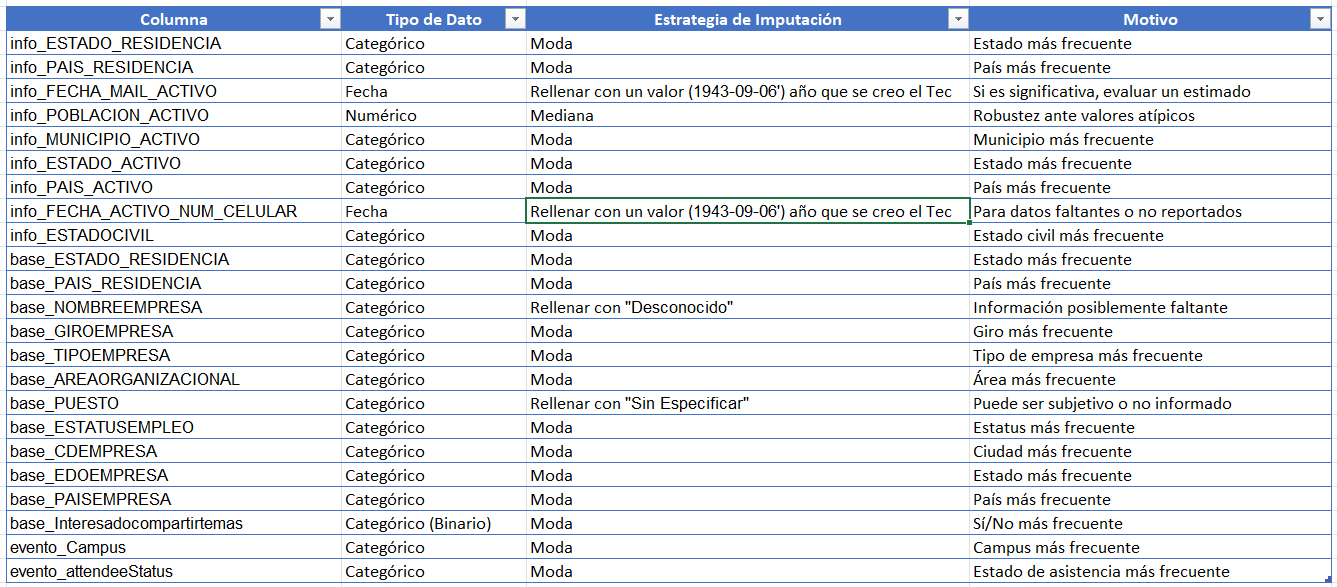

In [ ]:
# Verificar el tipo de la columna 'base_AñoGrad'
tipo_base_AñoGrad = df_unido['base_AñoGrad'].dtype

# Mostrar el tipo de dato
print("El tipo de dato de 'base_AñoGrad' es:", tipo_base_AñoGrad)


In [ ]:
# Convertir la columna 'base_AñoGrad' a tipo numérico (int), manejando posibles errores
df_unido['base_AñoGrad'] = pd.to_numeric(df_unido['base_AñoGrad'], errors='coerce')
df_unidoLDG['base_AñoGrad'] = pd.to_numeric(df_unidoLDG['base_AñoGrad'], errors='coerce')
df_unidoTalks['base_AñoGrad'] = pd.to_numeric(df_unidoTalks['base_AñoGrad'], errors='coerce')
df_unidoVoluntariado['base_AñoGrad'] = pd.to_numeric(df_unidoVoluntariado['base_AñoGrad'], errors='coerce')
df_unidoHistoriaExito['base_AñoGrad'] = pd.to_numeric(df_unidoHistoriaExito['base_AñoGrad'], errors='coerce')

# Después de convertir a numérico, rellena los NaN (si los hay) con un valor por defecto, como la mediana, por ejemplo
df_unido['base_AñoGrad'].fillna(df_unido['base_AñoGrad'].median(), inplace=True)
df_unidoLDG['base_AñoGrad'].fillna(df_unidoLDG['base_AñoGrad'].median(), inplace=True)
df_unidoTalks['base_AñoGrad'].fillna(df_unidoTalks['base_AñoGrad'].median(), inplace=True)
df_unidoVoluntariado['base_AñoGrad'].fillna(df_unidoVoluntariado['base_AñoGrad'].median(), inplace=True)
df_unidoHistoriaExito['base_AñoGrad'].fillna(df_unidoHistoriaExito['base_AñoGrad'].median(), inplace=True)

# Convertir la columna a entero
df_unido['base_AñoGrad'] = df_unido['base_AñoGrad'].astype(int)
df_unidoLDG['base_AñoGrad'] = df_unidoLDG['base_AñoGrad'].astype(int)
df_unidoTalks['base_AñoGrad'] = df_unidoTalks['base_AñoGrad'].astype(int)
df_unidoVoluntariado['base_AñoGrad'] = df_unidoVoluntariado['base_AñoGrad'].astype(int)
df_unidoHistoriaExito['base_AñoGrad'] = df_unidoHistoriaExito['base_AñoGrad'].astype(int)

# Verificar el tipo de dato después de la conversión
print("El tipo de dato de 'base_AñoGrad' después de la conversión es:", df_unido['base_AñoGrad'].dtype)


In [ ]:
# Calcular la mediana de la columna 'base_AñoGrad' en el DataFrame df_unido
mediana_ano_grad = df_unido['base_AñoGrad'].median()

# Mostrar la mediana calculada
print("La mediana del año de graduación es:", mediana_ano_grad)

In [ ]:
# Imputación usando la moda
def imputar_moda(df, column):
    moda = df[column].mode()[0]
    df[column].fillna(moda, inplace=True)

# Imputación usando la mediana (con conversión a numérico)
def imputar_mediana(df, column):
    # Convertimos la columna a numérico, errores se convierten a NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')
    mediana = df[column].median()
    df[column].fillna(mediana, inplace=True)

# Listas de columnas para imputar
columnas_moda = [
    'info_ESTADO_RESIDENCIA', 'info_PAIS_RESIDENCIA', 'info_MUNICIPIO_ACTIVO',
    'info_ESTADO_ACTIVO', 'info_PAIS_ACTIVO', 'info_ESTADOCIVIL',
    'base_ESTADO_RESIDENCIA', 'base_PAIS_RESIDENCIA', 'base_GIROEMPRESA',
    'base_TIPOEMPRESA', 'base_AREAORGANIZACIONAL', 'base_ESTATUSEMPLEO',
    'base_CDEMPRESA', 'base_EDOEMPRESA', 'base_PAISEMPRESA',
    'base_Interesadocompartirtemas', 'evento_Campus', 'evento_attendeeStatus'
]

columnas_mediana = ['info_POBLACION_ACTIVO']

# Aplicar imputación
for col in columnas_moda:
    imputar_moda(df_unido, col)
    imputar_moda(df_unidoHistoriaExito, col)
    imputar_moda(df_unidoVoluntariado, col)
    imputar_moda(df_unidoTalks, col)
    imputar_moda(df_unidoLDG, col)

for col in columnas_mediana:
    imputar_mediana(df_unido, col)
    imputar_mediana(df_unidoHistoriaExito, col)
    imputar_mediana(df_unidoVoluntariado, col)
    imputar_mediana(df_unidoTalks, col)
    imputar_mediana(df_unidoLDG, col)

# Imputación para fechas con valor por defecto
fechas_defecto = [
    'info_FECHA_MAIL_ACTIVO', 'info_FECHA_ACTIVO_NUM_CELULAR'
]

for col in fechas_defecto:
    df_unido[col].fillna(pd.Timestamp('2005-09-06'), inplace=True)
    df_unidoHistoriaExito[col].fillna(pd.Timestamp('2005-09-06'), inplace=True)
    df_unidoVoluntariado[col].fillna(pd.Timestamp('2005-09-06'), inplace=True)
    df_unidoTalks[col].fillna(pd.Timestamp('2005-09-06'), inplace=True)
    df_unidoLDG[col].fillna(pd.Timestamp('2005-09-06'), inplace=True)

    # Rellenar con texto en columnas de empresa
df_unido['base_NOMBREEMPRESA'].fillna('Desconocido', inplace=True)
df_unido['base_PUESTO'].fillna('Sin Especificar', inplace=True)

df_unidoHistoriaExito['base_NOMBREEMPRESA'].fillna('Desconocido', inplace=True)
df_unidoHistoriaExito['base_PUESTO'].fillna('Sin Especificar', inplace=True)

df_unidoVoluntariado['base_NOMBREEMPRESA'].fillna('Desconocido', inplace=True)
df_unidoVoluntariado['base_PUESTO'].fillna('Sin Especificar', inplace=True)

df_unidoTalks['base_NOMBREEMPRESA'].fillna('Desconocido', inplace=True)
df_unidoTalks['base_PUESTO'].fillna('Sin Especificar', inplace=True)

df_unidoLDG['base_NOMBREEMPRESA'].fillna('Desconocido', inplace=True)
df_unidoLDG['base_PUESTO'].fillna('Sin Especificar', inplace=True)

display("Imputación completada.")


In [ ]:
# Encontrar las columnas que tienen al menos un valor NaN
columnas_con_nan = df_unido.columns[df_unido.isna().any()].tolist()

# Mostrar el resultado
display("Columnas con valores NaN:", columnas_con_nan)

In [ ]:
display(df_unido['info_POBLACION_ACTIVO'])

In [ ]:
# Contar los valores vacíos (NaN) en la columna 'info_POBLACION_ACTIVO'
valores_vacios = df_unido['info_POBLACION_ACTIVO'].isna().sum()

# Calcular el total de filas en el DataFrame
total_filas = len(df_unido)

# Calcular el porcentaje de valores vacíos
porcentaje_vacios = (valores_vacios / total_filas) * 100

# Mostrar los resultados
display(f"Cantidad de valores vacíos en 'info_POBLACION_ACTIVO': {valores_vacios}")
display(f"Cantidad de valores vacíos en 'info_POBLACION_ACTIVO': {valores_vacios}")
(f"Porcentaje de valores vacíos: {porcentaje_vacios:.2f}%")


In [ ]:
#se eliminará la variable info_poblacion_activo
#Eliminación de variables
columnas_a_eliminar = ['info_POBLACION_ACTIVO']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)
df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)
df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)

display(df_unido.columns)
#display(df_marketing.head())

# Forzar la recolección de basura
gc.collect()

In [ ]:
# Calcular el porcentaje de valores NaN en cada columna
porcentaje_nan = df_unidoLDG.isna().mean() * 100

# Filtrar solo las columnas que tienen al menos un valor NaN
columnas_con_nan = porcentaje_nan[porcentaje_nan > 0]

# Mostrar las columnas con su porcentaje de valores NaN
display("Columnas con valores NaN y porcentaje correspondiente:")
display(columnas_con_nan)


# **Pregunta 2: ¿Cuáles son las estadísticas resumidas del conjunto de datos?**



In [ ]:
display(df_unido.describe())  # Muestra estadísticas resumidas de todas las columnas

In [ ]:
# Seleccionar solo las variables numéricas
numeric_df = df_unido.select_dtypes(include=[np.number])

# Calcular estadísticas avanzadas para las variables numéricas
numeric_stats = numeric_df.describe().transpose()

# Calcular skewness (asimetría)
numeric_stats['Skewness'] = numeric_df.skew()

# Calcular el coeficiente de variación (CV = std/mean) con manejo de división por cero
numeric_stats['Coeficiente de Variación'] = numeric_stats.apply(
    lambda row: row['std'] / row['mean'] if row['mean'] != 0 else np.nan, axis=1
)

# Mostrar las estadísticas avanzadas
display(numeric_stats)


## **Análisis:**

**Variables numéricas**
Las estadísticas resumidas para las variables numéricas fueron calculadas utilizando el método describe() de pandas, complementado con métricas avanzadas como skewness (asimetría) y el coeficiente de variación. Estas métricas nos permiten entender la distribución y variabilidad de las variables, y determinar si es necesario aplicar transformaciones adicionales para corregir distribuciones sesgadas.

**Observaciones**
* **opened**: Tiene un sesgo altamente positivo de 6.95, lo que indica que la mayoría de los valores son bajos. El coeficiente de variación es 0.75, lo cual sugiere una gran variación respecto a la media.
* **clicked**: Muestra un sesgo positivo aún mayor de 11.18, que nos dice que existe una una distribución muy asimétrica. El coeficiente de variación es 5.00, indicando que la mayoría de los registros no tienen clicks

**Variables categóricas**
Las estadísticas para las variables categóricas se calcularon con value_counts() y se presentaron como frecuencias relativas (% de cada categoría). Esto permitió identificar la proporción de cada categoría en relación con el total.

**Observaciones**
* **contactable_dominio_correo**: La mayoría de los correos pertenecen a dominios como gmail.com (43.94%), hotmail.com (16.09%) y tec.mx (11.48%). El resto se distribuye en más de 7,769 dominios diferentes.
* **contactable_estatus**: La mayoría de los registros están clasificados como Ciclo Anterior (92.46%), con solo el 7.53% en Ciclo Actual. Revisaremos con el egresados esto posiblemente es porque se encuentran en "inicio de ciclo".
* **base_SEXO**: Hay un mayor número de hombres (60.89%) que de mujeres (39.10%).
* **base_NACIONALIDAD**: Predominantemente Mexicana (95.91%), seguida por Colombiana (0.75%) y Ecuatoriana (0.59%). Las otras nacionalidades tienen una representación mínima.

**Identificación de patrones**
Se observó una alta concentración de valores en ciertos dominios de correo y en el estado de residencia (Nuevo León y Ciudad de México). Además, las variables relacionadas con premios y reconocimientos mostraron distribuciones sesgadas hacia premios recientes.

**Distribuciones sesgadas**: Las variables numéricas como opened y clicked presentaron un alto sesgo positivo. Aplicaremos transformaciones logarítmicas para las variables con sesgo positivo

**Siguientes pasos para tratamiento de datos**
Dado que algunas variables tienen alta dispersión y sesgo, aplicaremos algunas transformaciones como:
* **Transformación logarítmica**: Para variables como opened y clicked para reducir el sesgo positivo.

**Conclusión** El análisis estadístico ha permitido identificar características clave del conjunto de datos, como la existencia de distribuciones sesgadas, alta variabilidad en ciertas columnas y patrones de ausencia significativos. Las técnicas de visualización y métricas adicionales sugieren que se deben aplicar transformaciones y normalizaciones antes de proceder con un análisis más profundo.

# **Pregunta 3: ¿Hay valores atípicos en el conjunto de datos?**

Los valores atípicos son puntos de datos que se alejan significativamente del resto de las observaciones y pueden distorsionar análisis estadísticos, regresiones o modelos predictivos. Identificarlos nos ayudará a decidir si se deben eliminar, transformar o estudiar más a fondo.

In [ ]:
#Identificar valores atípicos con boxplots:

#for column in df_unido.select_dtypes(include=[np.number]).columns:
 #   sns.boxplot(x=df_unido[column])
  #  plt.show()

for column in df_unido.select_dtypes(include=[np.number]).columns:
    if not df_unido[column].empty:
        try:
            sns.boxplot(x=df_unido[column])
            plt.show()
        except ValueError:
            display(f"No se grafica la columna: {column} ya que no es un valor numérico o válido.")

In [ ]:
# Seleccionar solo las columnas numéricas del DataFrame
df_unido_numeric = df_unido.select_dtypes(include=['number'])

# Calcular los cuartiles y el IQR solo para las columnas numéricas
Q1 = df_unido_numeric.quantile(0.25)
Q3 = df_unido_numeric.quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos (outliers) en el DataFrame numérico
outliers = ((df_unido_numeric < (Q1 - 1.5 * IQR)) | (df_unido_numeric > (Q3 + 1.5 * IQR))).sum()

# Crear un resumen de outliers para cada columna
outlier_summary = pd.DataFrame({'Column': df_unido_numeric.columns, 'Outliers': outliers.values})

# Mostrar el resumen de valores atípicos usando display
display(outlier_summary)


##**Respuesta**:

**Recomendaciones para el tratamiento de valores atípicos**
* Transformación usando logaritmos
* Imputación con la mediana o con valores calculados basados en otras variables para mantener la integridad del conjunto de datos

**Descripción de los métodos utilizados**

**Boxplot**: Nos ayudó a resaltar visualmente los valores atípicos como puntos fuera del rango esperado (por encima o debajo de los bigotes).

**IQR**: Cualquier valor por debajo de
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Q1−1.5×IQR o por encima de
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Q3+1.5×IQR se considera un valor atípico.

No todos nuestros datos numéricos son relevantes o requieren el uso de un box plot. Por ejemplo, los valores que representan ID son simplemente identificadores asignados y no aportan información estadística útil. Por otro lado, las variables binarias numéricas (1,0), aunque son números, representan en realidad variables categóricas transformadas.

**Conclusión de la pregunta:**
Para identificar los valores atípicos en el conjunto de datos, se realizaron dos análisis principales: un análisis visual con boxplots y un análisis estadístico utilizando el rango intercuartílico (IQR).

Se encontró que las columnas 'opened' y 'clicked' presentan un número significativo de valores atípicos, posiblemente debido a la distribución sesgada de estos valores. Estos valores podrían ser estudiados para determinar si se deben eliminar, transformar o mantener como casos especiales.

# **Pregunta 4: ¿Cuál es la cardinalidad de las variables categóricas?**



In [ ]:
#Obtener el número de categorías únicas en las columnas categóricas
for col in df_unido.select_dtypes(include=['object']).columns:
    display(f"{col}: {df_unido[col].nunique()} categorías")


In [ ]:
#df_unido.select_dtypes(include=['object']).nunique()
df_unido['info_FECHA_MAIL_ACTIVO']

In [ ]:
df_unido['suscrito_FechaRegistro']

In [ ]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['info_FECHA_MAIL_ACTIVO'] = pd.to_datetime(df_unido['info_FECHA_MAIL_ACTIVO'], format='%d/%m/%Y', errors='coerce')
#df_unido['info_FECHA_ACTIVO'] = pd.to_datetime(df_unido['info_FECHA_ACTIVO'], format='%d/%m/%Y', errors='coerce')
#df_unido['info_FECHA_ACTIVO_NUM_CELULAR'] = pd.to_datetime(df_unido['info_FECHA_ACTIVO_NUM_CELULAR'], format='%d/%m/%Y', errors='coerce')
#df_unido['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], format='%d/%m/%Y', errors='coerce')

df_unido['info_FECHA_MAIL_ACTIVO'] = pd.to_datetime(df_unido['info_FECHA_MAIL_ACTIVO'], format='%d/%m/%Y %H:%M')
df_unido['info_FECHA_ACTIVO'] = pd.to_datetime(df_unido['info_FECHA_ACTIVO'], format='%d/%m/%Y %H:%M')
df_unido['info_FECHA_ACTIVO_NUM_CELULAR'] = pd.to_datetime(df_unido['info_FECHA_ACTIVO_NUM_CELULAR'], format='%d/%m/%Y %H:%M')



In [ ]:
df_unido['suscrito_FechaRegistro']

In [ ]:
df_unido['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], format='%d/%m/%Y %H:%M')

In [ ]:
df_unido['suscrito_FechaRegistro']

In [ ]:
#Obtener el número de categorías únicas en las columnas categóricas
for col in df_unido.select_dtypes(include=['object']).columns:
    display(f"{col}: {df_unido[col].nunique()} categorías")


## **Análisis**:
Esta pregunta nos ayuda a revisar los catálogos que existen

In [ ]:
#En este código trataremos de hacer más visual la información de los catálogos

# Crear una lista para almacenar los resultados
resultados = []

# Obtener los valores únicos de cada columna categórica
for col in df_unido.select_dtypes(include=['object']).columns:
    valores_unicos = df_unido[col].unique()
    num_valores = len(valores_unicos)

    # Si hay más de 10 valores únicos, mostrar solo los primeros 10
   #if num_valores > 10:
        #valores_mostrados = ", ".join(map(str, valores_unicos[:10])) + "..."
    #else:
    valores_mostrados = ", ".join(map(str, valores_unicos))

    # Agregar la columna, cantidad de categorías y los valores únicos (limitados a 10 si es el caso)
    resultados.append([col, num_valores, valores_mostrados])

# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame(resultados, columns=['Columna', 'Número de Categorías', 'Valores Únicos (primeros 10)'])

# Mostrar la tabla resultante
from IPython.display import display
display(df_resultados)


## **Análisis**

Existen atributos con más de 100 categorías, esto puede afectar el rendimiento del modelo o dificultar su interpretación.

Para estas columnas evaluaremos la opción de agrupar categorías similares o reducir la cardinalidad mediante técnicas como el one-hot encoding limitado o target encoding

**Transformaciones**
Existen columnas categóricas con cardinalidad muy baja (por ejemplo, columnas binarias o con tres categorías como base_HizoPrepaTec), se aplicarán técnicas como el label encoding en lugar de one-hot encoding para simplificar la codificación y evitar la explosión de variables dummy


# **Pregunta 5: ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?**


In [ ]:
#Visualizar distribuciones: histogramas para ver la distribución de cada columna.
for column in df_unido.select_dtypes(include=[np.number]).columns:
    sns.histplot(df_unido[column], kde=True)
    plt.show()


Análisis pasa saber si hay sesgos y aplicar transformaciones

In [ ]:
#Revisaremos si existen sesgos numéricos
for column in df_unido.select_dtypes(include=[np.number]).columns:
    skewness = df_unido[column].skew()
    display(f"Skewness de {column}: {skewness}")

#el valor de skewness ayudará a definir rápidamente el sesgo
#Cercano a 0: La distribución podría tomarse como simétrica.
#Mayor a 0.5: Existe un sesgo positivo (derecha).
#Menor a -0.5: Existe un sesgo negativo (izquierda).

In [ ]:
from scipy.stats import skew, kurtosis

for column in df_unido.select_dtypes(include=[np.number]).columns:
    skewness = skew(df_unido[column].dropna())  # Calcular asimetría
    kurt = kurtosis(df_unido[column].dropna())  # Calcular curtosis
    display(f"Variable: {column}, Asimetría (Skewness): {skewness:.2f}, Curtosis: {kurt:.2f}")


**Análisis de resultado**

Variables con sesgo positivo significativo:
*   opened (6.95)
*   clicked (11.17)
*   Contacto ID (2.58)
*   base_NIVELACADEMICO (1.97)

**¿Qué transformación aplicar?**: transformación logarítmica o raíz cuadrada. Esto ayudará a normalizar las distribuciones


In [ ]:
#Transformación logarítmica para sesgo positivo (valores mayores a 0)
#df_unido['opened_log'] = np.log1p(df_unido['opened'])  # Log(1 + x)
#df_unido['clicked_log'] = np.log1p(df_unido['clicked'])
#df_unido['Contacto_ID_log'] = np.log1p(df_unido['Contacto ID'])
#df_unido['base_NIVELACADEMICO_log'] = np.log1p(df_unido['base_NIVELACADEMICO'])


In [ ]:
#Transformación Yeo-Johnson para sesgo negativo
#from sklearn.preprocessing import PowerTransformer

#pt = PowerTransformer(method='yeo-johnson')
#df_unido['Correo_marketing_ID_trans'] = pt.fit_transform(df_unido[['Correo de marketing ID']])
#df_unido['info_FECHA_PREMIO1_trans'] = pt.fit_transform(df_unido[['info_FECHA_PREMIO1']])
#df_unido['info_FECHA_PREMIO2_trans'] = pt.fit_transform(df_unido[['info_FECHA_PREMIO2']])
#df_unido['info_FECHA_PREMIO3_trans'] = pt.fit_transform(df_unido[['info_FECHA_PREMIO3']])
#df_unido['info_FECHA_PREMIO4_trans'] = pt.fit_transform(df_unido[['info_FECHA_PREMIO4']])

#El sesgo no se dará en las fechas por el tipo de dato


Asimetría o skewness:
* Positivo (> 1): Distribución sesgada a la derecha.
* Negativo (< -1): Distribución sesgada a la izquierda.
* Entre -1 y 1: Distribución aproximadamente simétrica.

Curtosis:
* Valor alto (>3): Distribución con colas más pesadas de lo normal (leptocúrtica).
* Valor bajo (<3): Distribución con colas más ligeras de lo normal (platicúrtica).

##**Análisis**

El análisis de la distribución de las variables numéricas utilizando las métricas de asimetría (skewness) y curtosis nos dió luz para saber que muchas de las variables en el conjunto de datos presentan distribuciones sesgadas, por lo que es necesario aplicar transformaciones no lineales en ciertos casos para mejorar la calidad del análisis y la efectividad de los futuros modelos predictivos. A continuación se presenta un resumen de los hallazgos:

**Análisis de la asimetría- skewness**

Asimetría positiva: La mayoría de las variables presentan un alto grado de asimetría positiva (valores superiores a 1), lo cual indica que las distribuciones están sesgadas hacia la derecha, con pocos valores extremos en el lado superior:
* opened: Asimetría de 6.95.
* clicked: Asimetría de 11.18.

**Análisis de la curtosis**
La curtosis permite identificar la presencia de colas largas o pesadas en la distribución.
Una curtosis muy alta (> 3) indica que la variable tiene colas más pesadas de lo normal (leptocúrtica), mientras que una curtosis baja (< 3) indica colas más ligeras (platicúrtica).

Variables con curtosis alta:
* opened: Curtosis de 100.19.
* clicked: Curtosis de 276.56.

Estas variables tienen distribuciones con valores extremos que se desvían significativamente de la media, lo que puede afectar el desempeño de los modelos de aprendizaje automático.


**Conclusión**
La mayoría de las variables numéricas presentan distribuciones altamente sesgadas y con curtosis elevada. Aplicaremos transformaciones no lineales como el logaritmo y Box-Cox antes de proceder con la fase de modelado.
Estas transformaciones ayudarán a estabilizar la varianza, reducir la asimetría y mejorar la capacidad de los algoritmos para detectar patrones en el conjunto de datos.

# **Pregunta 6: ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo)**


In [ ]:
# Obtener los valores únicos de la columna 'HizoPrepaTec'
valores_unicos = df_unido['HizoPrepaTec'].unique()

# Contar la cantidad de valores únicos
cantidad_valores_unicos = len(valores_unicos)

# Mostrar los resultados
print("Valores únicos:", valores_unicos)
print("Cantidad de valores únicos:", cantidad_valores_unicos)


In [ ]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_FECHAGRADUACION'] = pd.to_datetime(df_unido['base_FECHAGRADUACION'], format='%d/%m/%Y', errors='coerce')
#Visualizar tendencias temporales usando gráficos de líneas para ver tendencias a lo largo del tiempo.
df_unido.set_index('info_FECHA_MAIL_ACTIVO').resample('M').count()['HizoPrepaTec'].plot() # Select the 'HizoPrepaTec' column after resampling and count to plot the trend
plt.show()


In [ ]:
df_unido[df_unido['info_FECHA_MAIL_ACTIVO'] > '2024-12-01']

**Preprocesamiento:**

Identificamos que en la columna 'info_FECHA_MAIL_ACTIVO' de la gráfica existían valores con fechas posteriores a la actual. Por ello, realizamos una limpieza para eliminar las incongruencias y establecer esos valores como nulos.

In [ ]:
#df_unido2 = df_unido
df_unido.loc[df_unido['info_FECHA_MAIL_ACTIVO'] > '2024-10-01', 'info_FECHA_MAIL_ACTIVO'] = pd.NaT


In [ ]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_FECHAGRADUACION'] = pd.to_datetime(df_unido['base_FECHAGRADUACION'], format='%d/%m/%Y', errors='coerce')
#Visualizar tendencias temporales usando gráficos de líneas para ver tendencias a lo largo del tiempo.
df_unido.set_index('info_FECHA_MAIL_ACTIVO').resample('M').count()['HizoPrepaTec'].plot() # Select the 'HizoPrepaTec' column after resampling and count to plot the trend
plt.show()


In [ ]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_AñoGrad'] = pd.to_datetime(df_unido['base_AñoGrad'],format='%Y', errors='coerce')
#Visualizar tendencias temporales usando gráficos de líneas para ver tendencias a lo largo del tiempo.
df_unido.set_index('info_FECHA_ACTIVO').resample('M').count()['HizoPrepaTec'].plot() # Select the 'HizoPrepaTec' column after resampling and count to plot the trend
#plt.show()

In [ ]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_AñoGrad'] = pd.to_datetime(df_unido['base_AñoGrad'], errors='coerce')
#Visualizar tendencias temporales usando gráficos de líneas para ver tendencias a lo largo del tiempo.
df_unido.set_index('info_FECHA_ACTIVO_NUM_CELULAR').resample('M').count()['HizoPrepaTec'].plot() # Select the 'HizoPrepaTec' column after resampling and count to plot the trend
#plt.show()

In [ ]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_AñoGrad'] = pd.to_datetime(df_unido['base_AñoGrad'], errors='coerce')
#Visualizar tendencias temporales usando gráficos de líneas para ver tendencias a lo largo del tiempo.
df_unido.set_index('suscrito_FechaRegistro').resample('M').count()['HizoPrepaTec'].plot() # Select the 'HizoPrepaTec' column after resampling and count to plot the trend
#plt.show()

**Análisis**

Las gráficas nos permitieron identificar valores atípicos, como en el caso de la columna 'info_FECHA_MAIL_ACTIVO', donde realizamos la limpieza de datos correspondiente. Además, verificamos la coherencia de los gráficos con la definición de cada columna, y los picos de actividad coinciden con las campañas que ha llevado a cabo el área de egresados.

#Generar catálogo de variables y su definición

# **Pregunta 7: ¿Hay correlación entre las variables dependientes e independientes?**

In [ ]:
#Matriz de correlación
corr_matrix = df_unido.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation calculation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
df_unido['replied']

**Análisis**

**IA_ID y HizoPrepaTec:** Tienen una correlación positiva moderada de 0.28, lo que sugiere que, en cierta medida, los usuarios con este ID pueden estar relacionados con haber hecho Prepa Tec.

**Clicked y Opened: **La correlación entre estas variables es de 0.15, lo que indica que existe una leve tendencia de que los usuarios que abren el correo tienden a hacer clic en él, aunque no es una relación particularmente fuerte.

**Correo de Marketing ID y base_NIVELACADEMICO:** La correlación es baja, alrededor de 0.049, lo que indica que prácticamente no hay relación entre estas dos variables.

**Ciclo Numerico y tiene_numero_celular: **Presentan una correlación de 0.17, lo cual es una relación positiva leve.
Un ejemplo claro es que en el ciclo anterior se hizo la campaña de actualización de datos por ello estas variables tienen una relación.


**Variables con baja correlación:**

La mayoría de las variables tienen correlaciones cercanas a 0, lo que sugiere que no tienen una relación lineal clara. Esto incluye variables como:

**IA_ID y opened: **Correlación muy baja (-0.006), lo que indica que no hay relación entre el ID y si se abrió el correo.

**Tiene_numero_celular y tiene_linkedin:** Presentan una correlación casi nula (0.035), lo que implica que tener un número de celular no está relacionado con tener un perfil en LinkedIn.


**Preprocesamiento**

 Observamos que la variable replied parece no tener correlación con ninguna otra variable, lo que probablemente indica falta de datos o que no se registraron suficientes respuestas como para establecer una relación. Por esta razón hemos obtado por eliminar la variable.

 Lo anterior es congruente, ya que al analizar la columna, observamos que mide el número de respuestas, y los correos fueron enviados desde una cuenta 'Noreply', lo que explica la ausencia de respuestas. Por ello, tomamos la decisión de eliminar la columna 'Replied' del DataFrame.




In [ ]:
# Encontrar las columnas categóricas (de tipo 'object')
categorical_columns = df_unido.select_dtypes(include=['object']).columns

# Mostrar las columnas categóricas
display("Columnas categóricas en df_unido:")
for col in categorical_columns:
    display(col)

In [ ]:
#Eliminación de variables
columnas_a_eliminar = ['replied']
df_unido = df_unido.drop(columns=columnas_a_eliminar)

# Forzar la recolección de basura
gc.collect()

# **Pregunta 8: ¿Cómo se distribuyen los datos en función de diferentes categorías?**

In [ ]:
# Ver las columnas categóricas
categorical_columns = df_unido.select_dtypes(include=['object']).columns

# Mostrar las primeras filas para asegurarse de que los datos se cargaron correctamente
display(df_unido.head())

# Generar gráficos de barras para cada columna categórica
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_unido, y=col, order=df_unido[col].value_counts().index[:10])  # Mostrar el top 10 para columnas con muchas categorías
    plt.title(f'Distribución de la columna: {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.show()

# Mostrar una tabla con la distribución de frecuencias de cada columna categórica
for col in categorical_columns:
    display(f"Distribución de la columna '{col}':")
    display(df_unido[col].value_counts())
    display("\n" + "-"*50 + "\n")


###Análisis bivariado

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar que las columnas existen en el DataFrame
if 'info_ESTADO_ACTIVO' in df_unido.columns and 'clicked' in df_unido.columns and 'opened' in df_unido.columns:

    # Gráfico de Boxplot para analizar la distribución de `clicked` por `estado`
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='info_ESTADO_ACTIVO', y='clicked', data=df_unido)
    plt.title('Distribución de la variable clicked por estado')
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de Boxplot para analizar la distribución de `opened` por `estado`
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='info_ESTADO_ACTIVO', y='opened', data=df_unido)
    plt.title('Distribución de la variable opened por estado')
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de Violin Plot para analizar `clicked` por `estado`
    plt.figure(figsize=(14, 6))
    sns.violinplot(x='info_ESTADO_ACTIVO', y='clicked', data=df_unido)
    plt.title('Distribución de la variable clicked por estado (Violin Plot)')
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de Bar Plot para el promedio de `clicked` por estado
    plt.figure(figsize=(14, 6))
    sns.barplot(x='info_ESTADO_ACTIVO', y='clicked', data=df_unido, estimator='mean')
    plt.title('Promedio de la variable clicked por estado')
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de Bar Plot para el promedio de `opened` por estado
    plt.figure(figsize=(14, 6))
    sns.barplot(x='info_ESTADO_ACTIVO', y='opened', data=df_unido, estimator='mean')
    plt.title('Promedio de la variable opened por estado')
    plt.xticks(rotation=45)
    plt.show()

else:
    display("Las columnas 'info_ESTADO_ACTIVO', 'clicked' o 'opened' no están disponibles en el DataFrame.")



Se agruparán para mejor visualización

In [ ]:
#Reemplazar NaNs en la columna antes de agrupar
df_unido['info_ESTADO_ACTIVO'].fillna('Desconocido', inplace=True)

# Contar la frecuencia de cada estado, incluyendo 'Desconocido'
estado_counts = df_unido['info_ESTADO_ACTIVO'].value_counts()

# Definir un umbral para incluir solo los estados con suficientes observaciones
umbral = 50  # Ajusta este valor según el análisis
df_unido['info_ESTADO_ACTIVO_agrupado'] = df_unido['info_ESTADO_ACTIVO'].apply(lambda x: x if estado_counts[x] > umbral else 'Otros')

# Filtrar los valores atípicos extremos para mejorar la visualización
df_filtered = df_unido[df_unido['opened'] < 30]  # Ajusta el valor según la distribución

# Crear el gráfico con estados agrupados
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_filtered, x='info_ESTADO_ACTIVO_agrupado', y='opened')
plt.xticks(rotation=45, ha='right')  # Ajustar las etiquetas del eje X
plt.title('Distribución de la variable opened por estado (Agrupado)')
plt.xlabel('Estado Activo (Agrupado)')
plt.ylabel('Opened')
plt.show()


# Análisis

## 1. **Distribución Geográfica**
- **info_ESTADO_ACTIVO:**
  - **Nuevo León** tiene la mayor concentración de datos, significativamente superior a cualquier otro estado.
  - Le siguen la **Ciudad de México**, **Estado de México**, **Jalisco**, **Querétaro**, entre otros, aunque en proporciones mucho menores.
  
- **info_PAIS_ACTIVO:**
  - **México** es el país dominante en los datos, con una abrumadora mayoría siendo sede de la mayoria de los campus.
  - En menor proporción, algunos registros están asociados a **Estados Unidos**, seguido por países de América Latina como **Honduras**, **Bolivia**, **Panamá**, y otros.

## 2. **Distribución Temporal**
- **info_FECHA_ACTIVO:**
  - La fecha más común de actividad registrada es **14/08/2022**.
  - Hay picos adicionales en **05/07/2023** y otras fechas en años anteriores, lo que sugiere actividad en varios periodos a lo largo de los años.

- **info_FECHA_ACTIVO_NUM_CELULAR:**
  - La fecha más registrada es **14/10/2019**.
  - También hay una actividad destacada en **04/12/2023** y fechas posteriores como **20/06/2024**, lo que sugiere que los números celulares activos han sido actualizados recientemente.

## 3. **Distribución de Estado Civil**
- **info_ESTADOCIVIL:**
  - **Soltero** es el estado civil predominante.
  - Una proporción considerable de registros corresponde a **Casado**, mientras que las otras categorías como **Divorciado**, **Viudo**, o **Unión libre** tienen una representación mínima.

## 4. **Distribución por Intereses**
- **Intereses** (como **info_interes_TECNOLOGIA**, **info_interes_EDUCACION**, **info_interes_LIDERAZGO**, etc.):
  - Las personas que han indicado intereses en categorías como **tecnología**, **educación**, **liderazgo**, **negocios**, **cultura**, y **salud** presentan distribuciones uniformes.
  - En todas estas categorías, los registros que afirman tener estos intereses son numerosos, indicando un alto nivel de afinidad hacia estos temas.

## 5. **Distribución por Género**
- **base_SEXO:**
  - Hay más registros de personas de **sexo masculino** en comparación con **femenino**.

## 6. **Distribución por Año de Nacimiento**
- **base_año_nac:**
  - La mayor parte de los registros corresponde a personas nacidas entre **1993** y **2002**, lo que sugiere que la mayoría de los egresados en la base de datos son jóvenes adultos, de entre 21 y 30 años.

## 7. **Distribución por Nacionalidad**
- **base_NACIONALIDAD:**
  - **Mexicana** es, de manera abrumadora, la nacionalidad más común, seguida en proporciones muy menores por **Colombiana**, **Ecuatoriana**, **Peruana**, **Estadounidense**, y otras nacionalidades de América Latina.

## 8. **Distribución de la Presencia en LinkedIn**
- **info_SOCIAL_LINKEDIN:**
  - La mayoría de las personas **no tienen** un perfil activo en **LinkedIn**, lo que podría indicar que prefieren otros canales de contacto o no están tan activos en redes profesionales.

## 9. **Distribución por Número de Celular**
- **info_NUMERO_CELULAR:**
  - La mayoría de los registros indican tener un número de celular registrado, lo que sugiere que existe un alto nivel de accesibilidad para contactarlos.

##Acerca de las bivariables por estado

**Alta variabilidad entre estados** El gráfico muestra que hay una alta variabilidad en la distribución de la variable opened dependiendo del estado de residencia del egresado.
Estados como Nuevo León, Ciudad de México y Querétaro tienen una mayor cantidad de aperturas de correos comparado con otros estados. Esto sugiere un mayor nivel de interacción en estas regiones.

**Estados con Mayor Cantidad de Outliers** Algunos estados como Nuevo León y Querétaro presentan un número considerable de outliers, lo que indica que hay un subconjunto de egresados que abren los correos con una frecuencia muy alta comparada con el promedio del resto de usuarios en su misma región.

Muchos estados como Durango, Aguascalientes, Morelos y Tabasco muestran una distribución concentrada en los valores más bajos de opened. Esto podría indicar un menor interés o participación de los egresados en estas áreas.

**Regiones Internacionales** Algunos estados no pertenecientes a México (como: Panamá, Guatemala, California, New York) tienen interacciones muy bajas y pocas observaciones, por lo que la cantidad de datos podría ser insuficiente para sacar conclusiones significativas.

# **Pregunta 9: ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?**


In [ ]:
# Seleccionar solo las columnas numéricas (K-means solo trabaja con datos numéricos)
numeric_columns = df_unido.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df_unido[numeric_columns].dropna()  # Eliminar filas con valores NaN

# Normalizar los datos para que todas las características tengan la misma escala
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Aplicar K-means para encontrar clusters
# Definir el número de clusters que queremos encontrar
kmeans = KMeans(n_clusters=5, random_state=42)  # Cambia n_clusters para buscar más o menos grupos
kmeans.fit(df_scaled)

# Agregar los clusters al DataFrame original
df_numeric['Cluster'] = kmeans.labels_

# Visualizar los clusters usando PCA (reducción de dimensionalidad a 2 componentes)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Crear un DataFrame con los resultados de PCA
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = kmeans.labels_

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100, alpha=0.7)
plt.title('Clusters encontrados mediante K-means')
plt.show()

# Evaluar el número óptimo de clusters
# Utilizamos el método del codo para determinar el número óptimo de clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la inercia para encontrar el "codo"
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo para encontrar el número óptimo de clusters')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
def calcular_coeficiente_silhouette(df, n_clusters):
  kmeans = KMeans(n_clusters=n_clusters)
  labels = kmeans.fit_predict(df)
  silhouette_avg = silhouette_score(df, labels)
  return silhouette_avg

coeficiente = calcular_coeficiente_silhouette(df_pca, 5)
print(f"Coeficiente de Silhouette para 5 clusters: {coeficiente}")

# Análisis
 - En el primer análisis de clusters, observamos que las clases no presentaban una buena definición visual. Por ello, decidimos reincorporar las columnas de interés. Aunque estas contienen numerosos valores vacíos, la información que aportan permite una mejor definición de los clusters.
  
  - Con las correcciones anteriores se observan patrones de agrupación en los datos mas definidos. Usando la técnica de **K-means**, indetificamos **seis clusters distintos**.
  - **Método del codo**:El método del codo confirma que **3 o 6 clusters** es una opción razonable para segmentar los datos, ya que la reducción en la inercia comienza a estabilizarse después de estos puntos, sin embargo al momento de obtener los graficos, hay mayor limpieza con 3.
  - Los puntos representados en el gráfico de **PCA** muestran que los datos se agrupan en diferentes regiones del espacio bidimensional, lo que sugiere que hay características compartidas entre los individuos dentro de cada cluster.


  - La normalización y reducción de dimensionalidad nos permiten observar que los datos contienen variables que son útiles para segmentar a los egresados en grupos con características similares. Esto será crucial para definir perfiles de **LDG**, **Voluntariado**, **Historia de éxito**, **Speaker en eventos**.





# ***Pregunta 10: ¿Se deberían normalizar las imágenes para visualizarlas mejor? No se usan imágenes***

No Aplica

# **Pregunta 11: ¿Hay desequilibrio en las clases de la variable objetivo?**

Para este análisis haremos iniciativa por iniciativa

###**Líder de generación**

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

In [ ]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_unidoLDG['es_LDGincubadora'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_LDGincubadora)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Incubadora (0)', 'Incubadora (1)'])
plt.show()

# Imprimir proporción
display(f"Proporción de clase 0 (No Incubadora): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporción de clase 1 (Incubadora): {class_counts[1] / sum(class_counts) * 100:.2f}%")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Análisis estadístico
# Conteo de las clases
class_counts = df_unidoLDG['es_LDGincubadora'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_LDGincubadora)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Incubadora (0)', 'Incubadora (1)'])
plt.show()

# Imprimir proporción (con manejo de clases faltantes)
total = sum(class_counts)

# Proporción de clase 0
if 0 in class_counts.index:
    proporcion_clase_0 = class_counts[0] / total * 100
    print(f"Proporción de clase 0 (No Incubadora): {proporcion_clase_0:.2f}%")
else:
    print("Clase 0 (No Incubadora) no está presente en los datos.")

# Proporción de clase 1
if 1 in class_counts.index:
    proporcion_clase_1 = class_counts[1] / total * 100
    print(f"Proporción de clase 1 (Incubadora): {proporcion_clase_1:.2f}%")
else:
    print("Clase 1 (Incubadora) no está presente en los datos.")


Técnicas a usar

Submuestreo: Reducir el número de ejemplos en la clase mayoritaria.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Definir la variable objetivo y las características
X = df_unidoLDG.drop('es_LDGincubadora', axis=1)
y = df_unidoLDG['es_LDGincubadora']

# Aplicar undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases balanceadas
df_resampled_unidoLDG = X_resampled.copy()
df_resampled_unidoLDG['es_LDGincubadora'] = y_resampled

display("Distribución de clases después del submuestreo:")
display(df_resampled_unidoLDG['es_LDGincubadora'].value_counts())


In [ ]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_resampled_unidoLDG['es_LDGincubadora'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_LDGincubadora)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Incubadora (0)', 'Incubadora (1)'])
plt.show()

# Imprimir proporción
display(f"Proporción de clase 0 (No Incubadora): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporción de clase 1 (Incubadora): {class_counts[1] / sum(class_counts) * 100:.2f}%")

In [ ]:
df_unidoLDG = df_resampled_unidoLDG.copy()

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

###**Voluntariado**

In [ ]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_unidoVoluntariado['es_Voluntariado'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_Voluntariado)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Voluntariado (0)', 'Voluntariado (1)'])
plt.show()

# Imprimir proporción
display(f"Proporción de clase 0 (No Voluntariado): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporción de clase 1 (Voluntariado): {class_counts[1] / sum(class_counts) * 100:.2f}%")

Submuestreo: Reducir el número de ejemplos en la clase mayoritaria.

In [ ]:
#from imblearn.under_sampling import RandomUnderSampler

# Definir la variable objetivo y las características
X = df_unidoVoluntariado.drop('es_Voluntariado', axis=1)
y = df_unidoVoluntariado['es_Voluntariado']

# Aplicar undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases balanceadas
df_resampled_unidoVoluntatiado = X_resampled.copy()
df_resampled_unidoVoluntatiado['es_Voluntariado'] = y_resampled

display("Distribución de clases después del submuestreo:")
display(df_resampled_unidoVoluntatiado['es_Voluntariado'].value_counts())


In [ ]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_resampled_unidoVoluntatiado['es_Voluntariado'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_Voluntariado)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Voluntariado (0)', 'Voluntariado (1)'])
plt.show()

# Imprimir proporción
display(f"Proporción de clase 0 (No Voluntariado): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporción de clase 1 (Voluntariado): {class_counts[1] / sum(class_counts) * 100:.2f}%")

In [ ]:
df_unidoVoluntariado = df_resampled_unidoVoluntatiado

###**Historia de éxito**

In [ ]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_unidoHistoriaExito['es_HistoriaExito'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_HistoriaExito)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Historia de Éxito (0)', 'Historia de Éxito (1)'])
plt.show()

# Imprimir proporción
display(f"Proporción de clase 0 (No Historia de Éxito): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporción de clase 1 (Historia de Éxito): {class_counts[1] / sum(class_counts) * 100:.2f}%")

Submuestreo: Reducir el número de ejemplos en la clase mayoritaria.

In [ ]:
#from imblearn.under_sampling import RandomUnderSampler

# Definir la variable objetivo y las características
X = df_unidoHistoriaExito.drop('es_HistoriaExito', axis=1)
y = df_unidoHistoriaExito['es_HistoriaExito']

# Aplicar undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases balanceadas
df_resampled_HistoriaExito = X_resampled.copy()
df_resampled_HistoriaExito['es_HistoriaExito'] = y_resampled

display("Distribución de clases después del submuestreo:")
display(df_resampled_HistoriaExito['es_HistoriaExito'].value_counts())


In [ ]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_resampled_HistoriaExito['es_HistoriaExito'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_HistoriaExito)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Historia de Éxito (0)', 'Historia de Éxito (1)'])
plt.show()

# Imprimir proporción
display(f"Proporción de clase 0 (No Historia de Éxito): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporción de clase 1 (Historia de Éxito): {class_counts[1] / sum(class_counts) * 100:.2f}%")

In [ ]:
df_unidoHistoriaExito = df_resampled_HistoriaExito

###**Talks: Speaker en evento realizado por Relaciones con Egresados**

In [ ]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_unidoTalks['es_Talks'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_Talks)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Speaker (0)', 'Speaker (1)'])
plt.show()

# Imprimir proporción
display(f"Proporción de clase 0 (No Speaker): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporción de clase 1 (Speaker): {class_counts[1] / sum(class_counts) * 100:.2f}%")

In [ ]:
df_unidoTalks['es_Talks']

Oversampling: Incrementar registros de la clase minoritaria

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Definir la variable objetivo y las características
X = df_unidoTalks.drop('es_Talks', axis=1)
y = df_unidoTalks['es_Talks']

# Aplicar sobremuestreo
oversample = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases balanceadas
df_resampled_Talks = X_resampled.copy()
df_resampled_Talks['es_Talks'] = y_resampled

# Imprimir la distribución de clases después del sobremuestreo
display("Distribución de clases después del sobremuestreo:")
display(df_resampled_Talks['es_Talks'].value_counts())

In [ ]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_resampled_Talks['es_Talks'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_Talks)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Speaker (0)', 'Speaker (1)'])
plt.show()

# Imprimir proporción
display(f"Proporción de clase 0 (No Speaker): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporción de clase 1 (Speaker): {class_counts[1] / sum(class_counts) * 100:.2f}%")

In [ ]:
df_unidoTalks = df_resampled_Talks

Submuestreo: Reducir el número de ejemplos en la clase mayoritaria.

El conjunto de datos presenta un claro desequilibrio de clases, donde la mayoría de los registros no están asociados a la iniciativa incubadora. Este desequilibrio puede generar problemas durante la fase de modelado, ya que los modelos tienden a favorecer la predicción de la clase mayoritaria. Para abordar este problema, aplicamos técnicas de re-balanceo de datos, optando en este caso por undersampling, lo que nos permitió obtener un total de 39,000 registros para entrenar el modelo.

**Iniciativa Voluntariado**

Al igual que en la iniciativa Líder de Generación, la iniciativa de Voluntariado también muestra un fuerte desequilibrio de clases, con la mayoría de los registros fuera de la iniciativa. Para mitigar el impacto de este desequilibrio y debido a la cantidad de datos disponibles, decidimos aplicar undersampling, obteniendo un total de 49,000 registros para el modelado.

**Iniciativa Historia de Éxito**

En el caso de la iniciativa Historia de Éxito, el desafío es aún mayor, ya que menos del 0.05% de los registros forman parte de la iniciativa. No obstante, dado el tipo de perfil de los datos, consideramos más apropiado realizar undersampling, lo que resultó en un conjunto final de 5,000 registros. Aunque el tamaño del conjunto es reducido, es suficiente para entrenar modelos lineales como regresión logística, regresión lineal o árboles de decisión.

**Iniciativa Speaker**

Similar a la iniciativa Historia de Éxito, la iniciativa de Speaker también presenta un claro desequilibrio de clases, donde la cantidad de Speakers es muy pequeña. En este caso, optamos por aplicar oversampling, logrando expandir el conjunto de datos a 600,000 registros para el modelado.


**Resumen General**

En las cuatro iniciativas, se utilizarán técnicas de re-balanceo como undersampling u oversampling  para asegurar un adecuado balance de clases durante la construcción de los modelos.

In [ ]:
# Forzar la recolección de basura
gc.collect()

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

#**Avance 2. Ingeniería de características**

**Objetivos**

2.3 Crear nuevas características para mejorar el rendimiento de los modelos.

2.4 Mitigar el riesgo de características sesgadas y acelerar la convergencia de algunos algoritmos.

##**Se aplicarán operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático. El procesamiento puede incluir:**

> Agregar bloque entrecomillado



###**Generación de nuevas características**

#### Eventos

**Cantidad de eventos asistidos** (total_eventos_asistidos)

**Descripción**: Esta variable indica el número total de eventos a los que un egresado ha asistido

**Justificación**: Permite entender qué tan involucrado está cada egresado con las actividades de EXATEC o la institución

In [ ]:
# Mostrar todas las columnas del DataFrame
#print(df_unido.columns)

print(list(df_unido.columns))

In [ ]:
#df_unido['total_eventos_asistidos'] = df_unido[df_unido['evento_CheckedIn'] == 1].groupby('IA_ID')['evento_CheckedIn'].transform('count')
#¿Vale la pena? de ser así se requiere la variable IA_ID

In [ ]:
#df_unido[['IA_ID', 'total_eventos_asistidos']]

In [ ]:
#Eventos Asistidos
#df_unidoHistoriaExito['total_eventos_asistidos'] = df_unidoHistoriaExito[df_unidoHistoriaExito['evento_CheckedIn'] == 1].groupby('IA_ID')['evento_CheckedIn'].transform('count')
#df_unidoLDG['total_eventos_asistidos'] = df_unidoLDG[df_unidoLDG['evento_CheckedIn'] == 1].groupby('IA_ID')['evento_CheckedIn'].transform('count')
#df_unidoTalks['total_eventos_asistidos'] = df_unidoTalks[df_unidoTalks['evento_CheckedIn'] == 1].groupby('IA_ID')['evento_CheckedIn'].transform('count')
#df_unidoVoluntariado['total_eventos_asistidos'] = df_unidoVoluntariado[df_unidoVoluntariado['evento_CheckedIn'] == 1].groupby('IA_ID')['evento_CheckedIn'].transform('count')

In [ ]:
#df_unidoHistoriaExito['total_eventos_asistidos']

In [ ]:
#df_unido["total_eventos_asistidos"].fillna(0, inplace=True)
#df_unidoHistoriaExito["total_eventos_asistidos"].fillna(0, inplace=True)
#df_unidoLDG["total_eventos_asistidos"].fillna(0, inplace=True)
#df_unidoTalks["total_eventos_asistidos"].fillna(0, inplace=True)
#df_unidoVoluntariado["total_eventos_asistidos"].fillna(0, inplace=True)

In [ ]:
#df_unidoVoluntariado["total_eventos_asistidos"]

In [ ]:
#df_unidoVoluntariado[['IA_ID', 'total_eventos_asistidos']]

**Participación en tipos de eventos** (participacion_categorias)

**Descripción**:Crea variables indicadoras para cada categoría de evento, reflejando si el egresado ha participado en eventos de tipo Conferencia, Taller, etc

**Justificación**:  Esto ayuda a identificar a los egresados que prefieren ciertos tipos de eventos y pueden ser relevantes para ciertas iniciativas o estrategias

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

In [ ]:
# Crear variables indicadoras para la participación en diferentes categorías de eventos
categorias = pd.get_dummies(df_unido['evento_Category'], prefix='participacion_categoria')
df_unido = pd.concat([df_unido, categorias], axis=1)
df_unidoHistoriaExito= pd.concat([df_unidoHistoriaExito, categorias], axis=1)
df_unidoLDG=pd.concat([df_unidoLDG, categorias], axis=1)
df_unidoTalks= pd.concat([df_unidoTalks, categorias], axis=1)
df_unidoVoluntariado = pd.concat([df_unidoVoluntariado, categorias], axis=1)

In [ ]:
display(df_unido.head(100))

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

In [ ]:
# Contar valores únicos en la columna 'evento_Category'
conteo_valores = df_unidoVoluntariado['participacion_categoria_Egresados - iniciativa de Participación_ eventos LDG'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)

In [ ]:
display(df_unidoLDG['evento_Category'])

In [ ]:
#Ahora eliminaremos el evento_categoría para no generar redundancia
#Eliminación de variables
columnas_a_eliminar = ['evento_Category']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)
df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)
df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

#### Suscripciones

**Antiguedad en suscripción** (antiguedad_suscripcion)

**Descripción**:Variable numérica que mide la antigüedad de la suscripción en días desde la fecha de registro hasta la fecha actual. Una mayor antigüedad podría indicar un mayor interés en los contenidos de los medios institucionales

**Justificación**: Conocer la antigüedad de la suscripción de un egresado puede ayudar a identificar qué tan reciente o comprometido está con los medios de la institución. Esta variable se podría usar para segmentar a los suscriptores en grupos de alto o bajo compromiso con la comunicación institucional

In [ ]:
from datetime import datetime
# Asegurarse de que la columna de fechas está en formato datetime
df_unido['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], errors='coerce')
df_unidoHistoriaExito['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], errors='coerce')
df_unidoLDG['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], errors='coerce')
df_unidoTalks['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], errors='coerce')
df_unidoVoluntariado['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], errors='coerce')

# Calcular la antigüedad en días desde la fecha de registro hasta la fecha actual
fecha_actual = datetime.now()
df_unido['antiguedad_suscripcion'] = (fecha_actual - df_unido['suscrito_FechaRegistro']).dt.days
df_unidoHistoriaExito['antiguedad_suscripcion'] =  (fecha_actual - df_unidoHistoriaExito['suscrito_FechaRegistro']).dt.days
df_unidoLDG['antiguedad_suscripcion'] =  (fecha_actual - df_unidoLDG['suscrito_FechaRegistro']).dt.days
df_unidoTalks['antiguedad_suscripcion'] =  (fecha_actual - df_unidoTalks['suscrito_FechaRegistro']).dt.days
df_unidoVoluntariado['antiguedad_suscripcion'] =  (fecha_actual - df_unidoVoluntariado['suscrito_FechaRegistro']).dt.days


In [ ]:
display(df_unido['antiguedad_suscripcion'].head())

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

In [ ]:
#Ahora eliminaremos el suscrito_FechaRegistro para no generar redundancia
#Eliminación de variables
columnas_a_eliminar = ['suscrito_FechaRegistro']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)
df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)
df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)

#### Demográficos

**Edad** (edad_egresado)

**Descripción**: Variable numérica que calcula la edad actual de los egresados a partir de su año de nacimiento (base_año_nacimiento). Ayuda a segmentar y categorizar a los egresados en diferentes grupos etarios

**Justificación**:Conocer la edad actual de los egresados es crucial para segmentar a la población en función de diferentes etapas de vida y tomar decisiones de acuerdo a sus preferencias y necesidades en función de su edad

In [ ]:
#from datetime import datetime

# Calcular la edad actual
# Convertir la columna base_año_nacimiento a formato numérico (int), ignorando errores
df_unido['base_año nac'] = pd.to_numeric(df_unido['base_año nac'], errors='coerce')
fecha_actual = datetime.now().year
df_unido['edad_egresado'] = fecha_actual - df_unido['base_año nac']
df_unidoHistoriaExito['edad_egresado'] =  fecha_actual - df_unido['base_año nac']
df_unidoLDG['edad_egresado'] =  fecha_actual - df_unido['base_año nac']
df_unidoTalks['edad_egresado'] = fecha_actual - df_unido['base_año nac']
df_unidoVoluntariado['edad_egresado'] =  fecha_actual - df_unido['base_año nac']


In [ ]:
display(df_unido['edad_egresado'].head())

In [ ]:
#Ahora eliminaremos el base_año nac para no generar redundancia
#Eliminación de variables
columnas_a_eliminar = ['base_año nac']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)
df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)
df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)

In [ ]:
display(df_unido.head())

**Antiguedad de graduación** (antiguedad_graduacion)

**Descripción**: Variable numérica que mide la antigüedad en años desde la fecha de graduación (base_AñoGrad). Una menor antigüedad puede indicar una conexión más fuerte con el tec

**Justificación**: Conocer la antigüedad desde la graduación permite entender qué tan reciente es el vínculo del egresado con la institución y ayuda a personalizar las campañas según el tiempo transcurrido desde su graduación.

In [ ]:
# Convertir la columna base_AñoGrad a formato numérico (int), ignorando errores
df_unido['base_AñoGrad'] = pd.to_numeric(df_unido['base_AñoGrad'], errors='coerce')
# Calcular la antigüedad desde la graduación
df_unido['antiguedad_graduacion'] = fecha_actual - df_unido['base_AñoGrad']
df_unidoHistoriaExito['antiguedad_graduacion'] =  fecha_actual - df_unido['base_AñoGrad']
df_unidoLDG['antiguedad_graduacion'] =   fecha_actual - df_unido['base_AñoGrad']
df_unidoTalks['antiguedad_graduacion'] = fecha_actual - df_unido['base_AñoGrad']
df_unidoVoluntariado['antiguedad_graduacion'] =   fecha_actual - df_unido['base_AñoGrad']

In [ ]:
display(df_unido['antiguedad_graduacion'].head())

In [ ]:
#Ahora eliminaremos el base_AñoGrad para no generar redundancia
#Eliminación de variables
columnas_a_eliminar = ['base_AñoGrad']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)
df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)
df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)

In [ ]:
df_unido['base_ESTATUSEMPLEO']

In [ ]:
# Contar valores únicos en la columna 'evento_Category'
conteo_valores = df_unido['base_ESTATUSEMPLEO'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)


#### Campañas de mailing

**Frecuencia en que abre los mails** (nivel engagement)

**Descripción**: Calcula el porcentaje de correos abiertos por el egresado sobre el total de correos recibidos (medido por Correo de marketing ID)

**Justificación**: Identificar la frecuencia con la que el egresado abre los correos electrónicos puede ayudar a segmentar la audiencia para campañas más efectivas. Un egresado que abre muchos correos podría ser considerado como "comprometido" o interesado en el contenido

In [ ]:
# Calcular la nivel_engagement (frecuencia de apertura de correos)
df_unido['nivel_engagement'] = (df_unido['opened'] / df_unido['Correo de marketing ID'].nunique())*100
df_unidoHistoriaExito['nivel_engagement'] =  (df_unidoHistoriaExito['opened'] / df_unidoHistoriaExito['Correo de marketing ID'].nunique())*100
df_unidoLDG['nivel_engagement'] =  (df_unidoLDG['opened'] / df_unidoLDG['Correo de marketing ID'].nunique())*100
df_unidoTalks['nivel_engagement'] =  (df_unidoTalks['opened'] / df_unidoTalks['Correo de marketing ID'].nunique())*100
df_unidoVoluntariado['nivel_engagement'] =  (df_unidoVoluntariado['opened'] / df_unidoVoluntariado['Correo de marketing ID'].nunique())*100


In [ ]:
display(df_unido['nivel_engagement'].max())

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()



```
# This is formatted as code
```

###**Discretización o *binning***

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

La discretización consiste en convertir variables continuas en variables categóricas (bins o grupos). Esto nos será útil para crear rangos (por ejemplo, edad en rangos de jóvenes, adultos, etc.)

**Variable**: Edad Egresado

**Justificación**: Discretizar la edad en rangos nos facilitará la identificación de patrones demográficos y a reducir la variabilidad en modelos que son sensibles a cambios numéricos pequeños

In [ ]:
# Discretización de la edad en grupos
bins = [0, 25, 35, 45, 55, 65, 100]  # Definir rangos de edad
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']  # Definir etiquetas para cada rango
df_unido['grupo_edad'] = pd.cut(df_unido['edad_egresado'], bins=bins, labels=labels, right=False)
df_unidoHistoriaExito['grupo_edad'] =  pd.cut(df_unidoHistoriaExito['edad_egresado'], bins=bins, labels=labels, right=False)
df_unidoLDG['grupo_edad'] =  pd.cut(df_unidoLDG['edad_egresado'], bins=bins, labels=labels, right=False)
df_unidoTalks['grupo_edad'] = pd.cut(df_unidoTalks['edad_egresado'], bins=bins, labels=labels, right=False)
df_unidoVoluntariado['grupo_edad'] =  pd.cut(df_unidoVoluntariado['edad_egresado'], bins=bins, labels=labels, right=False)


In [ ]:
display(df_unido['grupo_edad'].head())

In [ ]:
# Contar valores únicos en la columna 'evento_Category'
conteo_valores = df_unido['grupo_edad'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)


**Es importante analizar por qué el grupo de menores de 25 años (<25) en el resultado del binning numérico es tan reducido, a pesar de que la mayoría de los egresados suelen graduarse antes de esta edad. Este hecho resulta especialmente relevante considerando que en el DF se incluyeron las graduaciones de diciembre del 2023.**

**Variable**: antiguedad_graduacion

**Justificación**: Dividir la antigüedad en grupos (por ejemplo, reciente, intermedio, antiguo) podría ayudar a identificar patrones en el comportamiento de los egresados según su tiempo de egreso

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

In [ ]:
# Crear bins para agrupar la antigüedad en categorías
antiguedad_bins = [0, 5, 10, 20, 30, 50]  # Definir rangos de antigüedad
antiguedad_labels = ['0-5 años', '6-10 años', '11-20 años', '21-30 años', 'Más de 30 años']
df_unido['grupo_antiguedad_graduacion'] = pd.cut(df_unido['antiguedad_graduacion'], bins=antiguedad_bins, labels=antiguedad_labels, right=False)
df_unidoHistoriaExito['grupo_antiguedad_graduacion'] = pd.cut(df_unidoHistoriaExito['antiguedad_graduacion'], bins=antiguedad_bins, labels=antiguedad_labels, right=False)
df_unidoLDG['grupo_antiguedad_graduacion'] =  pd.cut(df_unidoLDG['antiguedad_graduacion'], bins=antiguedad_bins, labels=antiguedad_labels, right=False)
df_unidoTalks['grupo_antiguedad_graduacion'] = pd.cut(df_unidoTalks['antiguedad_graduacion'], bins=antiguedad_bins, labels=antiguedad_labels, right=False)
df_unidoVoluntariado['grupo_antiguedad_graduacion'] = pd.cut(df_unidoVoluntariado['antiguedad_graduacion'], bins=antiguedad_bins, labels=antiguedad_labels, right=False)

In [ ]:
display(df_unido['grupo_antiguedad_graduacion'].head())

**Variable**: open & clic

**Justificación**: Los usuarios pueden ser segmentados en "baja apertura", "media apertura", y "alta apertura" según cuántas veces abren los correos. Esto es útil para personalizar las campañas de marketing

In [ ]:
# Discretización de la frecuencia de apertura de correos
apertura_bins = [0, 10, 20, 30, 40, 50, 60]
apertura_labels = ['0-10% apertura', '10-20% aperturas', '20-30% aperturas', '30-40% aperturas', '40-50% aperturas', '>50% aperturas']

# Aplicar discretización en los DataFrames
df_unido['rangos_engagement'] = pd.cut(df_unido['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)

df_unidoHistoriaExito['frecuencia_apertura_correos'] = pd.cut(df_unidoHistoriaExito['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)
df_unidoLDG['frecuencia_apertura_correos'] = pd.cut(df_unidoLDG['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)
df_unidoTalks['frecuencia_apertura_correos'] = pd.cut(df_unidoTalks['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)
df_unidoVoluntariado['frecuencia_apertura_correos'] = pd.cut(df_unidoVoluntariado['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)

In [ ]:
display(df_unido['rangos_engagement'].head())

In [ ]:
# Contar valores únicos en la columna 'evento_Category'
conteo_valores = df_unido['rangos_engagement'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)

In [ ]:
# Contar valores únicos en la columna 'evento_Category'
conteo_valores = df_unido['evento_attendeeStatus'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)

In [ ]:
#Obtener el número de categorías únicas en las columnas categóricas
for col in df_unido.select_dtypes(include=['object']).columns:
    display(f"{col}: {df_unido[col].nunique()} categorías")

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

###**Codificación (ordinal, one hot,…)**

**Variable**: base_SEXO, base_NIVELACADEMICO

**Justificación**: La codificación adecuada garantiza que los modelos de machine learning puedan procesar y aprender patrones de variables categóricas, sin distorsionar las relaciones entre categorías

Nota: base_SEXO ya se había hecho onehot anteriormente

In [ ]:
# Encontrar los valores únicos de la columna 'base_NIVELACADEMICO'
unique_values_nivel_academico = df_unido['base_NIVELACADEMICO'].unique()

# Imprimir los valores únicos
print(unique_values_nivel_academico)

In [ ]:

# Crear un diccionario para mapear los valores originales con el nuevo orden jerárquico
nivel_academico_ordinal = {
    5: 1,  # Carrera
    8: 2,  # Maestría
    9: 3,  # Doctorado
    14: 4  # Postdoctorado
}

# Reemplazar los valores de 'base_NIVELACADEMICO' por los valores ordinales
df_unido['base_NIVELACADEMICO_ORD'] = df_unido['base_NIVELACADEMICO'].map(nivel_academico_ordinal)

# Eliminar la columna original 'base_NIVELACADEMICO'
df_unido.drop(columns=['base_NIVELACADEMICO'], inplace=True)

# Verificar el resultado
display(df_unido.head())


In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# One-Hot Encoding para variables categóricas
# se elimina base_NIVELACADEMICO
onehot_vars = ['categoria_dominio_correo', 'base_Tipo Escuela', 'base_TIPOEMPRESA']  # Variables categóricas

# Inicializar OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' elimina una columna para evitar multicolinealidad

# Realizar el One-Hot Encoding en df_unido
onehot_encoded = onehot_encoder.fit_transform(df_unido[onehot_vars])

# Convertir el resultado a DataFrame
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_vars))

# Concatenar con el DataFrame original (sin las columnas originales categóricas)
df_unido = pd.concat([df_unido.drop(columns=onehot_vars), onehot_df], axis=1)

# Repetir el proceso para los demás DataFrames
# Para df_unidoHistoriaExito
onehot_encoded_historia = onehot_encoder.fit_transform(df_unidoHistoriaExito[onehot_vars])
onehot_df_historia = pd.DataFrame(onehot_encoded_historia, columns=onehot_encoder.get_feature_names_out(onehot_vars))
df_unidoHistoriaExito = pd.concat([df_unidoHistoriaExito.drop(columns=onehot_vars), onehot_df_historia], axis=1)

# Para df_unidoLDG
onehot_encoded_ldg = onehot_encoder.fit_transform(df_unidoLDG[onehot_vars])
onehot_df_ldg = pd.DataFrame(onehot_encoded_ldg, columns=onehot_encoder.get_feature_names_out(onehot_vars))
df_unidoLDG = pd.concat([df_unidoLDG.drop(columns=onehot_vars), onehot_df_ldg], axis=1)

# Para df_unidoTalks
onehot_encoded_talks = onehot_encoder.fit_transform(df_unidoTalks[onehot_vars])
onehot_df_talks = pd.DataFrame(onehot_encoded_talks, columns=onehot_encoder.get_feature_names_out(onehot_vars))
df_unidoTalks = pd.concat([df_unidoTalks.drop(columns=onehot_vars), onehot_df_talks], axis=1)

# Para df_unidoVoluntariado
onehot_encoded_voluntariado = onehot_encoder.fit_transform(df_unidoVoluntariado[onehot_vars])
onehot_df_voluntariado = pd.DataFrame(onehot_encoded_voluntariado, columns=onehot_encoder.get_feature_names_out(onehot_vars))
df_unidoVoluntariado = pd.concat([df_unidoVoluntariado.drop(columns=onehot_vars), onehot_df_voluntariado], axis=1)



In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

In [ ]:
# Verificar que las columnas se han agregado
display(df_unido.head())

La variable Rol con TEC puede tener los siguientes valores:

* EXATEC
* Colaborador
* Donante
* Consejero
* PAdre de familia
* Alumno

Pero en esa variable si son más de 1, se guarda así
"Colaborador; Donante; Exatec"

Por ello se deben separar y hacer un one hot encoding

In [ ]:
# Separar los roles en columnas diferentes
df_unido['rol'] = df_unido['rol'].str.split(';')

# Aplicar One-Hot Encoding a la columna separada de roles
roles_encoded = df_unido['rol'].str.join('|').str.get_dummies()
df_unido = pd.concat([df_unido, roles_encoded], axis=1)

# Separar los roles en columnas diferentes
df_unidoLDG['rol'] = df_unidoLDG['rol'].str.split(';')

# Aplicar One-Hot Encoding a la columna separada de roles
roles_encoded = df_unidoLDG['rol'].str.join('|').str.get_dummies()
df_unidoLDG = pd.concat([df_unidoLDG, roles_encoded], axis=1)

# Separar los roles en columnas diferentes
df_unidoHistoriaExito['rol'] = df_unidoHistoriaExito['rol'].str.split(';')

# Aplicar One-Hot Encoding a la columna separada de roles
roles_encoded = df_unidoHistoriaExito['rol'].str.join('|').str.get_dummies()
df_unidoHistoriaExito = pd.concat([df_unidoHistoriaExito, roles_encoded], axis=1)

# Separar los roles en columnas diferentes
df_unidoTalks['rol'] = df_unidoTalks['rol'].str.split(';')

# Aplicar One-Hot Encoding a la columna separada de roles
roles_encoded = df_unidoTalks['rol'].str.join('|').str.get_dummies()
df_unidoTalks = pd.concat([df_unidoTalks, roles_encoded], axis=1)

# Separar los roles en columnas diferentes
df_unidoVoluntariado['rol'] = df_unidoVoluntariado['rol'].str.split(';')

# Aplicar One-Hot Encoding a la columna separada de roles
roles_encoded = df_unidoVoluntariado['rol'].str.join('|').str.get_dummies()
df_unidoVoluntariado = pd.concat([df_unidoVoluntariado, roles_encoded], axis=1)


df_unido.drop(columns=['rol'], inplace=True)
df_unidoLDG.drop(columns=['rol'], inplace=True)
df_unidoHistoriaExito.drop(columns=['rol'], inplace=True)
df_unidoTalks.drop(columns=['rol'], inplace=True)
df_unidoVoluntariado.drop(columns=['rol'], inplace=True)

###**Escalamiento (normalización, estandarización, min – max,…)**

In [ ]:
display(df_unido.head())

**Variables**: opened, clicked

**Ténica**: Standard Scaling
Ventajas:
Reduce la influencia de variables con varianza elevada, asegurando que todas las variables contribuyan por igual.

**Justificación**:
Para las variables que presentan una amplia dispersión de valores, como opened y clicked, estandarizarlas ayuda a evitar que los valores altos dominen el modelo

**Justificación general:**
El escalamiento se elige basándose en el tipo de variable y su distribución:

Variables con rango acotado: Aplicamos *Min-Max Scaling* para llevarlas a [0, 1], ya que no necesitan centrado y es importante preservar las relaciones
relativas entre los valores.

Variables con mucha varianza: Aplicamos *Standard Scaling* para asegurar que no afecten de manera desproporcionada a los modelos.


In [ ]:
#Importar las librerías necesarias
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#variables a escalar
variables_escalar = [
    'opened', 'clicked'
]

#Verificamos si las variables existen en el DataFrame
variables_existentes = [var for var in variables_escalar if var in df_unido.columns]
#Se Aplicaa Min-Max Scaling para ajustar al rango [0, 1]
minmax_scaler = MinMaxScaler()
df_unido[variables_existentes] = minmax_scaler.fit_transform(df_unido[variables_existentes])
#Centraremos las variables a media 0 y desviación estándar 1, usar StandardScaler
standard_scaler = StandardScaler()
df_unido[variables_existentes] = standard_scaler.fit_transform(df_unido[variables_existentes])


#Verificamos si las variables existen en el DataFrame
variables_existentes = [var for var in variables_escalar if var in df_unidoHistoriaExito.columns]
#Se Aplicaa Min-Max Scaling para ajustar al rango [0, 1]
minmax_scaler = MinMaxScaler()
df_unidoHistoriaExito[variables_existentes] = minmax_scaler.fit_transform(df_unidoHistoriaExito[variables_existentes])
#Centraremos las variables a media 0 y desviación estándar 1, usar StandardScaler
standard_scaler = StandardScaler()
df_unidoHistoriaExito[variables_existentes] = standard_scaler.fit_transform(df_unidoHistoriaExito[variables_existentes])


#Verificamos si las variables existen en el DataFrame
variables_existentes = [var for var in variables_escalar if var in df_unidoLDG.columns]
#Se Aplicaa Min-Max Scaling para ajustar al rango [0, 1]
minmax_scaler = MinMaxScaler()
df_unidoLDG[variables_existentes] = minmax_scaler.fit_transform(df_unidoLDG[variables_existentes])
#Centraremos las variables a media 0 y desviación estándar 1, usar StandardScaler
standard_scaler = StandardScaler()
df_unidoLDG[variables_existentes] = standard_scaler.fit_transform(df_unidoLDG[variables_existentes])


#Verificamos si las variables existen en el DataFrame
variables_existentes = [var for var in variables_escalar if var in df_unidoTalks.columns]
#Se Aplicaa Min-Max Scaling para ajustar al rango [0, 1]
minmax_scaler = MinMaxScaler()
df_unidoTalks[variables_existentes] = minmax_scaler.fit_transform(df_unidoTalks[variables_existentes])
#Centraremos las variables a media 0 y desviación estándar 1, usar StandardScaler
standard_scaler = StandardScaler()
df_unidoTalks[variables_existentes] = standard_scaler.fit_transform(df_unidoTalks[variables_existentes])


#Verificamos si las variables existen en el DataFrame
variables_existentes = [var for var in variables_escalar if var in df_unidoVoluntariado.columns]
#Se Aplicaa Min-Max Scaling para ajustar al rango [0, 1]
minmax_scaler = MinMaxScaler()
df_unidoVoluntariado[variables_existentes] = minmax_scaler.fit_transform(df_unidoVoluntariado[variables_existentes])
#Centraremos las variables a media 0 y desviación estándar 1, usar StandardScaler
standard_scaler = StandardScaler()
df_unidoVoluntariado[variables_existentes] = standard_scaler.fit_transform(df_unidoVoluntariado[variables_existentes])



In [ ]:
from sklearn.preprocessing import PowerTransformer

# Transformación Logarítmica para variables sesgadas #total_eventos_asistidos
variables_log = ['nivel_engagement']
for var in variables_log:
    df_unido[var + '_log'] = np.log1p(df_unido[var])
    df_unidoHistoriaExito[var + '_log'] = np.log1p(df_unidoHistoriaExito[var])
    df_unidoLDG[var + '_log'] = np.log1p(df_unidoLDG[var])
    df_unidoTalks[var + '_log'] = np.log1p(df_unidoTalks[var])
    df_unidoVoluntariado[var + '_log'] = np.log1p(df_unidoVoluntariado[var])

# Aplicación de Yeo-Johnson para variables con valores negativos o complejos
pt = PowerTransformer(method='yeo-johnson')
df_unido['edad_egresado_yeojohnson'] = pt.fit_transform(df_unido[['edad_egresado']])
df_unidoHistoriaExito['edad_egresado_yeojohnson'] = pt.fit_transform(df_unidoHistoriaExito[['edad_egresado']])
df_unidoLDG['edad_egresado_yeojohnson'] = pt.fit_transform(df_unidoLDG[['edad_egresado']])
df_unidoTalks['edad_egresado_yeojohnson'] = pt.fit_transform(df_unidoTalks[['edad_egresado']])
df_unidoVoluntariado['edad_egresado_yeojohnson'] = pt.fit_transform(df_unidoVoluntariado[['edad_egresado']])

# Normalización Min-Max para mantener todas las variables en el mismo rango
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
variables_minmax = ['opened', 'clicked']
df_unido[variables_minmax] = scaler.fit_transform(df_unido[variables_minmax])
df_unidoHistoriaExito[variables_minmax] = scaler.fit_transform(df_unidoHistoriaExito[variables_minmax])
df_unidoLDG[variables_minmax] = scaler.fit_transform(df_unidoLDG[variables_minmax])
df_unidoTalks[variables_minmax] = scaler.fit_transform(df_unidoTalks[variables_minmax])
df_unidoVoluntariado[variables_minmax] = scaler.fit_transform(df_unidoVoluntariado[variables_minmax])



Se aplicó una transformación logarítmica a las variables con distribuciones sesgadas para reducir el efecto de valores extremos. Además, la transformación Yeo-Johnson fue útil para variables con valores negativos, lo que permite que el modelo las interprete correctamente. Finalmente, se utilizó Min-Max Scaling para asegurar que las variables mantengan el mismo rango, evitando que alguna característica domine el análisis debido a su magnitud.


In [ ]:
display(df_unido['clicked'].head())

## **Conclusiones**

Se utilizó la codificación One-Hot para la variable ‘base_Tipo Escuela’, debido a que esta variable no tiene un orden natural. Transformarla en variables binarias asegura que cada categoría sea tratada como independiente.

Por otro lado, aplicamos escalado Min-Max a las variables de apertura y clics de correos electrónicos. Esto garantiza que todos los valores estén en el mismo rango [0,1], lo cual es crucial para mejorar la eficiencia en modelos basados en distancia.

##ARREGLAR LA SELECCIÓN DEL MÉTODO
Finalmente, empleamos PCA para reducir la dimensionalidad del conjunto, eliminando redundancias y acelerando los tiempos de entrenamiento, sin perder información relevante.

El proceso de preparación de datos en esta fase fue alineado con la metodología CRISP-ML, asegurando que los datos sean precisos, relevantes y estén en el formato adecuado para los modelos de aprendizaje automático.

Primero, se identificaron y manejaron valores atípicos y se trató la ausencia de datos, garantizando la calidad del dataset. Luego, se crearon nuevas características relevantes que fortalecen el análisis, como la antigüedad desde la graduación y la frecuencia de participación en eventos.

Además, se aplicaron transformaciones y escalado para asegurar la correcta interpretación de los algoritmos y mejorar la convergencia. Finalmente, a través de técnicas de selección de características (análisis factorial), se optimizó el conjunto de datos para reducir la complejidad del modelo, maximizando así la eficiencia del proceso de modelado.



#**Además, se utilizarán métodos de filtrado para la selección de características y técnicas de extracción de características, permitiendo reducir los requerimientos de almacenamiento, la complejidad del modelo y el tiempo de entrenamiento. Los ejemplos siguientes son ilustrativos, pero no exhaustivos, de lo que se podría aplicar**

##Umbral de varianza

**Justificación:** El umbral de varianza elimina variables con baja variabilidad, ya que estas aportan poco o nada al modelo.

**Decisión:** Se usó un umbral de 0.01 para eliminar columnas cuya varianza es menor al 1%.

**Resultado:**Reducción del ruido en los datos y simplificación del modelo sin pérdida significativa de información.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Umbral para mantener variables con más del 1% de varianza
selector = VarianceThreshold(threshold=0.01)
X_var_threshold = selector.fit_transform(df_unido.select_dtypes(include=['number']))

# Obtener las columnas retenidas
columns_retained = df_unido.select_dtypes(include=['number']).columns[selector.get_support()]
display("Columnas retenidas por umbral de varianza:", columns_retained)


Con la información anterior se responden preguntas como

¿Las columnas retenidas tienen sentido desde un punto de vista del negocio?

**Sí vemos que las variables mostradas generan valor al negocio, excepto el TipoEmpresanan por ello decidimos eliminarla**

¿Existen columnas que aún sean redundantes o que puedan ser combinadas con otras variables?

In [ ]:
#Eliminación de variables
#columnas_a_eliminar = ['base_TIPOEMPRESA_nan']
#df_unido = df_unido.drop(columns=columnas_a_eliminar)
#df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)
#df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
#df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)
#df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)

display(df_unido.columns)

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

##Correlación entre las variables retenidas

In [ ]:
# Verificar las columnas que sí están en el DataFrame
columns_retained_valid = [col for col in columns_retained if col in df_unido.columns]

# Calcular la matriz de correlación con las columnas válidas
correlation_matrix = df_unido[columns_retained_valid].corr()

# Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación - Variables Retenidas')
plt.show()


**Análisis del Mapa de Correlación**

Correlación Fuerte (cercana a ±1):

**IA_ID con base_año_nacimiento (-0.77):** Esto indica una fuerte correlación negativa. A medida que aumenta el año de nacimiento (egresados más jóvenes), el IA_ID decrece. Lo que podemos asumir que el ID fue ordenado por matrícula en orden descendente

Correlaciones Moderadas:

**antiguedad_graduacion con edad_egresado (0.87):** Sugiere que a mayor edad del egresado, mayor es la antigüedad de su graduación. Este tipo de correlación es esperable y valida los datos.

**nivel_engagement con opened (0.30):** Hay una correlación positiva moderada, lo que indica que un mayor engagement está vinculado a más correos abiertos, aunque no es determinante.


**Correlaciones Débiles (cercanas a 0):**
Muchas de las variables tienen correlaciones muy bajas entre sí, indicando que no están relacionadas de forma significativa. Esto es positivo porque permite mantener varias variables sin riesgo de redundancia.

**Acciones:**

**edad_egresado con base_año_nacimiento (-1.00):** Esta es una correlación perfecta negativa, lo que confirma la relación directa entre la edad y el año de nacimiento, por ello se eliminará pues la edad_egresado se calculó con base_año_nacimiento

**base_AñoGrad con antiguedad_graduacion (-0.77):** Esto es lógico, ya que cuanto más antiguo sea el año de graduación, mayor será la antigüedad en la graduación, se eliminará el base_añograd ya que genera redundancia

In [ ]:
display(df_unido.columns)

In [ ]:
#display(df_unido['base_año nac'].head())

In [ ]:
#Eliminación de variables
#columnas_a_eliminar = ['base_año nac', 'base_AñoGrad']
#df_unido = df_unido.drop(columns=columnas_a_eliminar)
#df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)
#df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
#df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)
#df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)

#display(df_unido.columns)

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

##Análisis para seleccionar las variables de mayor importancia

**Método 1: Chi-cuadrado**

**Uso:** Ideal para variables categóricas independientes que se utilizan para predecir una variable objetivo categórica.

**Ventajas:**

* Fácil de aplicar.
* Útil para preseleccionar variables categóricas.

**Limitación:**
* Solo funciona para datos categóricos, no aplicable a datos numéricos.

**Nuestro caso:** Este método no sería el más adecuado ya que nuestro enfoque se basa en variables numéricas o el objetivo no es categórico.



**Método 2: ANOVA (Análisis de Varianza)**

**Uso:**: Útil para evaluar si las medias de una variable numérica difieren significativamente entre diferentes categorías de una variable categórica.

**Ventajas:**
Ayuda a determinar qué variables categóricas influyen significativamente en las variables numéricas.

**Limitación:**
Solo permite analizar una variable numérica dependiente a la vez.

**Nuestro caso:** Podría ser útil al determinar variables categóricas (como nivel académico o tipo de empresa) influyen en una variable numérica como engagement o edad del egresado. Sin embargo, tiene limitaciones ya que nuestras variables son de mayor complejista



**Método 3: PCA (Análisis de Componentes Principales)**

**Uso:**
Reducción de dimensionalidad, transforma las variables originales en componentes principales no correlacionadas.
Ayuda a identificar combinaciones lineales de variables que explican la mayor variabilidad del conjunto de datos.

**Ventajas:**
* Muy útil ya que tenemos muchas variables numéricas con posible colinealidad.
* Facilita la interpretación y simplifica los modelos.

**Limitación:**
* Las componentes principales pueden perder interpretabilidad, ya que representan combinaciones de variables.
* No se puede aplicar directamente a variables categóricas sin preprocesamiento

**Nuestro caso:**
Dado que tenemos varias variables numéricas y podríamos enfrentar problemas de multicolinealidad, PCA lo vemos como un enfoque muy útil para reducir la complejidad y mantener la información relevante.



**Método 4: Análisis Factorial (FA)**
**Uso:**
Similar a PCA, pero se enfoca en descubrir los factores latentes entre las variables.

**Ventajas:**
* Útil al sospechar que varias variables miden aspectos similares de un fenómeno.
* Permite generar factores latentes que faciliten la interpretación del modelo.

**Limitación:**
* Es más interpretativo y subjetivo que el PCA.
* Requiere que las variables tengan cierta estructura de correlación.

**Nuestro caso:**
La matriz de correlación no representa que las variables posean aspectos diferentes del comportamiento de los egresados (por ejemplo, engagement, tipo de empresa, y nivel académico),


**Conclusión: Mejor Método para nuestro caso**

**PCA (Análisis de Componentes Principales)**

Es la opción más adecuada para nuestra situación, debido a los siguientes factores:
* **Colinealidad:** La matriz de correlación muestra algunas correlaciones moderadas y fuertes que podrían afectar los modelos predictivos si no se tratan.
* **Variables Numéricas:** Muchas de las variables importantes son numéricas (opened, clicked, engagement, edad, antigüedad).
* **Reducción de dimensionalidad:** PCA nos permitirá simplificar el conjunto de datos manteniendo la mayor parte de la información relevante, lo que facilitará la construcción de modelos más eficientes.

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()
 # Reemplazar los NaN por "0" en todo el DataFrame
 df_unidoLDG['es_LDGincubadora'].fillna(0, inplace=True)
 df_unidoVoluntariado['es_Voluntariado'].fillna(0, inplace=True)
 df_unidoTalks['es_Talks'].fillna(0, inplace=True)
 df_unidoHistoriaExito['es_HistoriaExito'].fillna(0, inplace=True)

In [ ]:
# Seleccionar solo las columnas numéricas
df_numerico = df_unido.select_dtypes(include='number')

# Mostrar las primeras filas de los datos numéricos
print(df_numerico.head())


In [ ]:
# Asegurarse de que las columnas numéricas definidas existan en el DataFrame
columnas_numéricas = ['opened', 'clicked', 'correo de marketing ID', 'tiene_numero_celular',
                      'tiene_linkedin', 'HizoPrepaTec', 'antiguedad_suscripcion',
                      'edad_egresado', 'antiguedad_graduacion', 'nivel_engagement']

# Filtrar solo las columnas numéricas que existen en el DataFrame
columns_available = [col for col in columnas_numéricas if col in df_unido.columns]

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Filtrar las variables numéricas seleccionadas del DataFrame
X = df_unido[columns_available].select_dtypes(include=['number'])

# Asegurarse de que no haya NaNs o infinitos
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Aplicar PCA y ajustar los datos
pca = PCA(n_components=min(5, X.shape[1]))  # Ajustar a menos componentes si hay pocas columnas
X_pca = pca.fit_transform(X)

# Visualizar la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.ylabel('Proporción de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.title('Varianza Explicada por cada Componente Principal')
plt.show()

# Crear un DataFrame con las nuevas componentes principales
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Mostrar las primeras filas del DataFrame resultante
display(df_pca.head())


In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

#JUSTIFICAR POR QUÉ NO SE USÓ PCA

Análisis factorial

In [ ]:
!pip install factor_analyzer

In [ ]:
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer


# Filtrar solo las variables numéricas del DataFrame
X_numerico = df_unido[columns_available].select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = X_numerico.corr().abs()

# Identificar pares de variables altamente correlacionadas
high_corr_var = np.where(correlation_matrix > 0.95)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                   for x, y in zip(*high_corr_var) if x != y]

#Eliminar una variable de cada par altamente correlacionado
variables_a_eliminar = [var[1] for var in high_corr_pairs]
X_reducido = X_numerico.drop(columns=variables_a_eliminar)

#Manejar NaNs e infinitos en los datos
X_reducido = X_reducido.replace([np.inf, -np.inf], np.nan)  # Reemplazar inf por NaN
X_reducido = X_reducido.dropna()  # Eliminar filas con NaNs

# Asegurarse de que no haya valores faltantes o infinitos
if np.any(np.isnan(X_reducido)) or np.any(np.isinf(X_reducido)):
    print("Error: Todavía existen NaNs o infinitos en los datos.")
else:
    #Escalar las variables numéricas
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_reducido)

    #Aplicar el análisis factorial con 5 factores y rotación varimax
    fa = FactorAnalyzer(n_factors=5, rotation='varimax')
    fa.fit(X_scaled)

    #Crear un DataFrame con las cargas factoriales y mostrarlo
    cargas_factoriales = pd.DataFrame(
        fa.loadings_,
        index=X_reducido.columns,
        columns=[f'Factor_{i+1}' for i in range(fa.loadings_.shape[1])]
    )

    display(cargas_factoriales)

    #Obtener y mostrar la varianza explicada por cada factor
    varianza_explicada = pd.DataFrame({
        'Varianza Explicada': fa.get_factor_variance()[1],
        'Varianza Acumulada': fa.get_factor_variance()[2]
    }, index=[f'Factor_{i+1}' for i in range(fa.loadings_.shape[1])])

    display("Varianza explicada por cada factor:")
    display(varianza_explicada)


Durante la preparación de los datos, se aplicaron técnicas de ingeniería de características para asegurar la calidad del modelo. La selección de variables mediante umbral de varianza y análisis factorial simplificó el conjunto de datos. La normalización y transformación de datos aseguraron una mejor convergencia de los algoritmos. Estas decisiones alinean nuestra preparación de datos con la metodología CRISP-ML, asegurando que los datos estén listos para la fase de modelado y que respondan a las necesidades estratégicas del negocio.

In [ ]:
# Forzar la recolección de basura
gc.collect()

##Tener todo en un csv para trabajar desde aqui

In [ ]:
# Guardar el DataFrame df_unido en un archivo CSV
df_unido.to_csv(folder_path + 'bases/df_unido_limpio.csv', index=False)
df_unidoLDG.to_csv(folder_path + 'bases/df_unido_limpioLGD.csv', index=False)
df_unidoVoluntariado.to_csv(folder_path + 'bases/df_unido_limpioVoluntariado.csv', index=False)
df_unidoTalks.to_csv(folder_path + 'bases/df_unido_limpioTalks.csv', index=False)
df_unidoHistoriaExito.to_csv(folder_path + 'bases/df_unido_limpioHistoriaExito.csv', index=False)


#Trabajar solo con CSV

In [1]:
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')
#folder_path = '/content/drive/My Drive/Proyecto Integrador/'
#folder_path = '/content/drive/My Drive/Proyecto Integrador/colab/'

#Octavio - Luis
folder_path = '/content/drive/My Drive/Proyecto Integrador/'

#Yocelin (owner)
#folder_path = '/content/drive/My Drive/Proyecto Integrador/Proyecto Integrador/'

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import gc

Mounted at /content/drive


In [2]:
#Unir DF con una iniciativa Historia de éxito
ruta_archivo =  folder_path + 'bases/HistoriaExito.csv'
df_unido = pd.read_csv(ruta_archivo)

ruta_archivo =  folder_path + 'bases/df_unido_limpioLGD.csv'
df_unidoLDG = pd.read_csv(ruta_archivo)

ruta_archivo =  folder_path + 'bases/df_unido_limpioVoluntariado.csv'
df_unidoVoluntariado = pd.read_csv(ruta_archivo)

ruta_archivo =  folder_path + 'bases/df_unido_limpioTalks.csv'
df_unidoTalks = pd.read_csv(ruta_archivo)

ruta_archivo =  folder_path + 'bases/df_unido_limpioHistoriaExito.csv'
df_unidoHistoriaExito = pd.read_csv(ruta_archivo)

In [3]:
#Por seguridad desconectamos de drive
from google.colab import drive
drive.flush_and_unmount()

In [4]:
import types
# Filtrar variables que no sean de tipo DataFrame, función, clase o módulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolección de basura para liberar memoria
gc.collect()

0

#Avance 3. Baseline

##¿Qué algoritmo (individual, NO ensambles) se puede utilizar como baseline para predecir las variables objetivo?


Para problemas de clasificación como el nuestro, algunos algoritmos comunes y efectivos que analizamos son

**Regresión logística:** Sencillo y fácil de interpretar,  buena opción cuando las relaciones entre las variables son lineales.

**Árboles de decisión:** Capaces de manejar interacciones complejas entre características, pero susceptibles a sobreajuste si no se podan adecuadamente.

**k-Nearest Neighbors (k-NN):** Un algoritmo no paramétrico que puede ser una buena opción cuando no se tiene una suposición clara sobre la forma de los datos.

En nuestro caso, usaremos la **Regresión Logística** como baseline, ya que es simple y fácil de interpretar. Esto nos permitirá medir la viabilidad inicial del problema.

###Trabajar previo a modelo

In [5]:
# Calcular el porcentaje de valores NaN en cada columna
porcentaje_nan = df_unidoLDG.isna().mean() * 100

# Filtrar solo las columnas que tienen al menos un valor NaN
columnas_con_nan = porcentaje_nan[porcentaje_nan > 0]

# Mostrar las columnas con su porcentaje de valores NaN
display("Columnas con valores NaN y porcentaje correspondiente:")
display(columnas_con_nan)


'Columnas con valores NaN y porcentaje correspondiente:'

,0
opened,66.024804
clicked,66.024804
replied,66.024804
Correo de marketing ID,66.024804
Campaña ID,66.024804
...,...
base_TIPOEMPRESA_Mexicana,0.009832
base_TIPOEMPRESA_Transnacional en México,0.009832
base_TIPOEMPRESA_nan,0.009832
nivel_engagement_log,66.024804


In [6]:
from sklearn.impute import SimpleImputer

# Separar variables numéricas y categóricas
num_cols = df_unidoLDG.select_dtypes(include=['number']).columns
cat_cols = df_unidoLDG.select_dtypes(include=['object']).columns

# Imputar variables numéricas con la mediana
imputer_num = SimpleImputer(strategy='median')
df_unidoLDG[num_cols] = imputer_num.fit_transform(df_unidoLDG[num_cols])

# Imputar variables categóricas con la moda (valor más frecuente)
imputer_cat = SimpleImputer(strategy='most_frequent')
df_unidoLDG[cat_cols] = imputer_cat.fit_transform(df_unidoLDG[cat_cols])

# Verificar si aún existen NaNs
porcentaje_nan_despues = df_unidoLDG.isna().mean() * 100
columnas_con_nan_despues = porcentaje_nan_despues[porcentaje_nan_despues > 0]

# Mostrar las columnas que aún tienen NaN, si es que existen
display("Columnas con valores NaN después de la imputación:")
display(columnas_con_nan_despues)


'Columnas con valores NaN después de la imputación:'

,0


In [7]:
# Imputar la columna 'grupo_edad' con la moda
df_unidoLDG['grupo_edad'].fillna(df_unidoLDG['grupo_edad'].mode()[0], inplace=True)

# Imputar la columna 'grupo_antiguedad_graduacion' con la moda
df_unidoLDG['grupo_antiguedad_graduacion'].fillna(df_unidoLDG['grupo_antiguedad_graduacion'].mode()[0], inplace=True)

# Verificar si aún quedan NaNs
porcentaje_nan_final = df_unidoLDG.isna().mean() * 100
columnas_con_nan_final = porcentaje_nan_final[porcentaje_nan_final > 0]

# Mostrar las columnas con valores NaN después de la segunda imputación
display("Columnas con valores NaN después de la segunda imputación:")
display(columnas_con_nan_final)


'Columnas con valores NaN después de la segunda imputación:'

,0


In [8]:
#Eliminación de variables
columnas_a_eliminar = ['_merge', 'frecuencia_apertura_correos']
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)

In [9]:
# Calcular el porcentaje de valores NaN en cada columna
porcentaje_nan = df_unidoLDG.isna().mean() * 100

# Filtrar solo las columnas que tienen al menos un valor NaN
columnas_con_nan = porcentaje_nan[porcentaje_nan > 0]

# Mostrar las columnas con su porcentaje de valores NaN
display("Columnas con valores NaN y porcentaje correspondiente:")
display(columnas_con_nan)


'Columnas con valores NaN y porcentaje correspondiente:'

,0


###Creción de modelo

In [10]:
# Convertir variables categóricas en numéricas usando OneHotEncoding o LabelEncoding
df_unidoLDG_encoded = pd.get_dummies(df_unidoLDG, drop_first=True)
df_unidoVoluntariado_encoded = pd.get_dummies(df_unidoVoluntariado, drop_first=True)
df_unidoTalks_encoded = pd.get_dummies(df_unidoTalks, drop_first=True)
df_unidoHistoriaExito_encoded = pd.get_dummies(df_unidoHistoriaExito, drop_first=True)


###Métricas

Dado quetuvimos un problema de clases desbalanceadas, **Accuracy** no es una buena métrica,  es más recomendable usar** F1-Score o ROC AUC**

**F1-Score**

**Descripción:** media entre la precisión (proporción de predicciones positivas correctas) y el recall o sensibilidad (proporción de verdaderos positivos identificados correctamente).

**Cuándo usarlo:** Las clases están desbalanceadas

**Ventajas:** Evita que el modelo se enfoque solo en una métrica (precisión o recall), lo que es útil cuando el coste de los falsos negativos y falsos positivos es importante.

**Desventajas:** No proporciona una visión completa de cómo el modelo se desempeña a diferentes umbrales de decisión.


####Líder de generación Regresión Logística

In [10]:
# Filtrar variables que no sean de tipo DataFrame, función, clase o módulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolección de basura para liberar memoria
gc.collect()

0

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_unidoLDG_encoded.drop(columns=['es_LDGincubadora'])  #la columna objetivo
y = df_unidoLDG_encoded['es_LDGincubadora']

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
display(f"Accuracy del modelo baseline: {accuracy}")
display(classification_report(y_test, y_pred))



'Accuracy del modelo baseline: 0.8285814606741573'

'              precision    recall  f1-score   support\n\n         0.0       0.83      1.00      0.91     11799\n         1.0       0.00      0.00      0.00      2441\n\n    accuracy                           0.83     14240\n   macro avg       0.41      0.50      0.45     14240\nweighted avg       0.69      0.83      0.75     14240\n'

In [12]:
# Extraer los coeficientes del modelo
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_[0])
}).sort_values(by='Importance', ascending=False)

print("Importancia de las características:")
print(feature_importance)


Importancia de las características:
                                      Feature    Importance
3                      Correo de marketing ID  4.447712e-12
10                     antiguedad_suscripcion  2.246065e-20
11                              edad_egresado  9.050995e-22
12                      antiguedad_graduacion  4.868768e-22
4664      evento_EventName_Festum 2023 EXATEC  5.227761e-23
...                                       ...           ...
224   info_FECHA_MAIL_ACTIVO_09/03/2022 00:00  0.000000e+00
1293       info_FECHA_ACTIVO_18/02/2020 00:00  0.000000e+00
1300       info_FECHA_ACTIVO_18/06/1998 00:00  0.000000e+00
1303       info_FECHA_ACTIVO_18/06/2020 00:00  0.000000e+00
142   info_FECHA_MAIL_ACTIVO_03/11/2021 00:00  0.000000e+00

[5056 rows x 2 columns]


In [13]:
# Filtrar variables que no sean de tipo DataFrame, función, clase o módulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolección de basura para liberar memoria
gc.collect()

0

Historia de éxito Regresión logística

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_unidoHistoriaExito_encoded.drop(columns=['es_HistoriaExito'])  # la columna objetivo
y = df_unidoHistoriaExito_encoded['es_HistoriaExito']

# Imputar los valores faltantes (NaN) en X con la media de cada columna
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)  # Aumentar max_iter si es necesario
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo baseline: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy del modelo baseline: 0.9595987935750859
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     13681
         1.0       0.00      0.00      0.00       576

    accuracy                           0.96     14257
   macro avg       0.48      0.50      0.49     14257
weighted avg       0.92      0.96      0.94     14257



##Talks (Speakers) Regresión Logística

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np

# Tomar una muestra reducida del DataFrame para evitar carga excesiva
df_sample = df_unidoTalks_encoded.sample(frac=0.3, random_state=42)  # Reduce la muestra al 30% de los datos

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_sample.drop(columns=['es_Talks'])  # Ajustar según la columna objetivo
y = df_sample['es_Talks']

# Identificar las columnas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Convertir todas las columnas categóricas en strings (por si hay mezcla de tipos de datos)
X[categorical_cols] = X[categorical_cols].astype(str)

# Aplicar OneHotEncoder a las columnas categóricas, limitando el número de categorías y dividiendo en lotes
column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(max_categories=3, handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# Transformar las variables categóricas
batch_size = 1000  # Procesar en lotes de 1000 filas
X_transformed = np.vstack([column_transformer.fit_transform(X[i:i+batch_size]) for i in range(0, X.shape[0], batch_size)])

# Imputar los NaN en las variables numéricas con la media de la columna
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_transformed)

# Aplicar PCA para reducir la dimensionalidad, limitando el número de componentes
pca = PCA(n_components=50)  # Mantener solo 50 componentes
X_reduced = pca.fit_transform(X_imputed)

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=500)  # Incrementar el número de iteraciones para asegurar convergencia
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo de Regresión Logística: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy del modelo de Regresión Logística: 0.5324660103141116
              precision    recall  f1-score   support

           0       1.00      0.06      0.12      4264
           1       0.52      1.00      0.68      4268

    accuracy                           0.53      8532
   macro avg       0.76      0.53      0.40      8532
weighted avg       0.76      0.53      0.40      8532



##Voluntariado Regresión Logística

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np

# Tomar una muestra reducida del DataFrame para evitar carga excesiva
df_sample = df_unidoVoluntariado_encoded.sample(frac=0.3, random_state=42)  # Reduce la muestra al 30% de los datos

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_sample.drop(columns=['es_Voluntariado'])  # Ajustar según la columna objetivo
y = df_sample['es_Voluntariado']

# Identificar las columnas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Convertir todas las columnas categóricas en strings (por si hay mezcla de tipos de datos)
X[categorical_cols] = X[categorical_cols].astype(str)

# Aplicar OneHotEncoder a las columnas categóricas, limitando el número de categorías y dividiendo en lotes
column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(max_categories=3, handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# Transformar las variables categóricas
batch_size = 1000  # Procesar en lotes de 1000 filas
X_transformed = np.vstack([column_transformer.fit_transform(X[i:i+batch_size]) for i in range(0, X.shape[0], batch_size)])

# Imputar los NaN en las variables numéricas con la media de la columna
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_transformed)

# Aplicar PCA para reducir la dimensionalidad, limitando el número de componentes
pca = PCA(n_components=50)  # Mantener solo 50 componentes
X_reduced = pca.fit_transform(X_imputed)

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=500)  # Incrementar el número de iteraciones para asegurar convergencia
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo de Regresión Logística: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy del modelo de Regresión Logística: 0.7307283924400085
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84      3345
         1.0       0.89      0.08      0.15      1364

    accuracy                           0.73      4709
   macro avg       0.81      0.54      0.49      4709
weighted avg       0.77      0.73      0.64      4709



#Entrega 4

##Voluntariado Random Forest

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Seleccionar las columnas categóricas
categorical_cols = df_unidoVoluntariado_encoded.select_dtypes(include=['object']).columns

# Convertir todas las columnas categóricas a strings
df_unidoVoluntariado[categorical_cols] = df_unidoVoluntariado[categorical_cols].astype(str)

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_unidoVoluntariado_encoded.drop(columns=['es_Voluntariado'])  # Ajustar según la columna objetivo
y = df_unidoVoluntariado_encoded['es_Voluntariado']

# Aplicar OneHotEncoder a las columnas categóricas
column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough')

# Transformar las variables categóricas
X_transformed = column_transformer.fit_transform(X)

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest con una profundidad máxima de 3
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo Random Forest con max_depth=3: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy del modelo Random Forest con max_depth=3: 0.9067218859509398
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     11265
         1.0       1.00      0.67      0.80      4430

    accuracy                           0.91     15695
   macro avg       0.94      0.83      0.87     15695
weighted avg       0.92      0.91      0.90     15695



## Voluntariado KNN

In [ ]:
"""
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Seleccionar las columnas categóricas
categorical_cols = df_unidoVoluntariado_encoded.select_dtypes(include=['object']).columns

# Convertir todas las columnas categóricas a strings
df_unidoVoluntariado[categorical_cols] = df_unidoVoluntariado[categorical_cols].astype(str)

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_unidoVoluntariado_encoded.drop(columns=['es_Voluntariado'])  # Ajustar según la columna objetivo
y = df_unidoVoluntariado_encoded['es_Voluntariado']

# Aplicar OneHotEncoder a las columnas categóricas
column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough')

# Transformar las variables categóricas
X_transformed = column_transformer.fit_transform(X)

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

selector = SelectKBest(f_classif, k=10)  # Select top 10 features
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)


# Crear y entrenar el modelo de K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')  # Puedes ajustar el número de vecinos (k)
knn_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo KNN: {accuracy}")
print(classification_report(y_test, y_pred))


Desarrollamos el modelo K-Nearest Neighbors (KNN) porque es especialmente adecuado para problemas de recomendación, donde la similitud entre observaciones es clave. KNN es eficaz en escenarios donde la relación entre las características y el resultado no sigue una tendencia lineal clara, lo que lo convierte en una opción sólida para capturar patrones complejos o no lineales en los datos.
Sin embargo, al implementar el modelo, experimentamos problemas significativos de rendimiento, particularmente en el uso de memoria RAM. Esto se debe a que KNN es un algoritmo que requiere almacenar y calcular distancias con todos los puntos de datos en cada consulta, lo que puede volverse muy costoso en términos computacionales cuando se trabaja con grandes conjuntos de datos. Como resultado, el proceso de ejecución sobrecargó los recursos disponibles de memoria, lo que llevó al sistema a fallar y detener el proceso. Y por lo anterior decidimos no continuar con dicho modelo.

##Voluntariado Ridge

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_unidoVoluntariado_encoded.drop(columns=['es_Voluntariado'])
y = df_unidoVoluntariado_encoded['es_Voluntariado']

# Imputación de valores faltantes para características numéricas
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Si hay más de 10,000 filas, reducir el tamaño del conjunto de datos a un 50%
if X.shape[0] > 10000:
    X, y = resample(X, y, n_samples=int(X.shape[0] * 0.5), random_state=42)

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de Ridge
ridge_model = Ridge(alpha=1.0)  # Ajusta alpha según sea necesario
ridge_model.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba
y_pred = ridge_model.predict(X_test_scaled)

# Evaluar el rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.00036274766566519036
R^2 Score: 0.9981457167289511


##Voluntariado Lasso

In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_unidoVoluntariado_encoded.drop(columns=['es_Voluntariado'])
y = df_unidoVoluntariado_encoded['es_Voluntariado']

# Si el dataset es demasiado grande, reducir el tamaño a un 50% para evitar el crash
if X.shape[0] > 10000:
    X, y = resample(X, y, n_samples=int(X.shape[0] * 0.5), random_state=42)

# Imputación de valores faltantes
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Imputar valores numéricos con la media
if len(numeric_cols) > 0:
    numeric_imputer = SimpleImputer(strategy='mean')
    X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

# Imputar valores categóricos con la moda, solo si existen columnas categóricas
if len(categorical_cols) > 0:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA para reducir la dimensionalidad, manteniendo el 95% de la varianza
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# Crear y entrenar el modelo de Lasso
lasso_model = Lasso(alpha=1.0)  # Puedes ajustar el valor de alpha para regularización
lasso_model.fit(X_train_reduced, y_train)

# Predicciones en el conjunto de prueba
y_pred = lasso_model.predict(X_test_reduced)

# Evaluar el rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.19565624510817897
R^2 Score: -0.00015006716870069603


##Voluntariado Decision Tree

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separar las variables predictoras (X) y la variable objetivo (y)
X1 = df_unidoVoluntariado_encoded.drop(columns=['es_Voluntariado'])  # la columna objetivo
y1 = df_unidoVoluntariado_encoded['es_Voluntariado']

# División de los datos en conjunto de entrenamiento y prueba
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Árbol de Decisión
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X1_train, y1_train)

# Predicciones en el conjunto de prueba
y1_pred = model.predict(X1_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y1_test, y1_pred)
display(f"Accuracy del modelo de Árbol de Decisión: {accuracy}")
display(classification_report(y1_test, y1_pred))


'Accuracy del modelo de Árbol de Decisión: 0.9856005097164702'

'              precision    recall  f1-score   support\n\n         0.0       0.98      1.00      0.99     11265\n         1.0       1.00      0.95      0.97      4430\n\n    accuracy                           0.99     15695\n   macro avg       0.99      0.98      0.98     15695\nweighted avg       0.99      0.99      0.99     15695\n'

#Hacia abajo no funciona

##Pruebas adicionales

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np

# Tomar una muestra reducida del DataFrame para evitar carga excesiva (opcional)
df_sample = df_unidoTalks_encoded.sample(frac=0.4, random_state=42)  # Reduce la muestra al 30% de los datos

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_sample.drop(columns=['es_Talks'])  # Ajustar según la columna objetivo
y = df_sample['es_Talks']

# Identificar las columnas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Convertir todas las columnas categóricas en strings (por si hay mezcla de tipos de datos)
X[categorical_cols] = X[categorical_cols].astype(str)

# Aplicar OneHotEncoder a las columnas categóricas, limitando el número de categorías y dividiendo en lotes
column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(max_categories=5, handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# Transformar las variables categóricas
batch_size = 1000  # Procesar en lotes de 1000 filas
X_transformed = np.vstack([column_transformer.fit_transform(X[i:i+batch_size]) for i in range(0, X.shape[0], batch_size)])

# Imputar los NaN en las variables numéricas con la media de la columna
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_transformed)

# Aplicar PCA para reducir la dimensionalidad, limitando el número de componentes
pca = PCA(n_components=60)  # Mantener solo 50 componentes
X_reduced = pca.fit_transform(X_imputed)

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest con un número reducido de estimadores y profundidad limitada
model = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)  # Menos árboles y profundidad
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo Random Forest con max_depth=2: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy del modelo Random Forest con max_depth=2: 0.9970112517580872
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5763
           1       0.99      1.00      1.00      5613

    accuracy                           1.00     11376
   macro avg       1.00      1.00      1.00     11376
weighted avg       1.00      1.00      1.00     11376



###Hisotoria de éxito

In [15]:
# Filtrar variables que no sean de tipo DataFrame, función, clase o módulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolección de basura para liberar memoria
gc.collect()

0

In [16]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_unidoHistoriaExito_encoded.drop(columns=['es_HistoriaExito'])  # Ajustar según tu columna objetivo
y = df_unidoHistoriaExito_encoded['es_HistoriaExito']

# Identificar las columnas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Convertir todas las columnas categóricas en strings (por si hay mezcla de tipos de datos)
X[categorical_cols] = X[categorical_cols].astype(str)

# Aplicar OneHotEncoder a las columnas categóricas
column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

# Transformar las variables categóricas
X_transformed = column_transformer.fit_transform(X)

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo Random Forest con max_depth=3: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy del modelo Random Forest con max_depth=3: 0.9837974328400084
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     13681
         1.0       1.00      0.60      0.75       576

    accuracy                           0.98     14257
   macro avg       0.99      0.80      0.87     14257
weighted avg       0.98      0.98      0.98     14257



##Speakers

In [17]:
# Filtrar variables que no sean de tipo DataFrame, función, clase o módulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolección de basura para liberar memoria
gc.collect()

0

In [19]:
# Filtrar variables que no sean de tipo DataFrame, función, clase o módulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolección de basura para liberar memoria
gc.collect()

54

In [21]:
# Filtrar variables que no sean de tipo DataFrame, función, clase o módulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolección de basura para liberar memoria
gc.collect()

90

In [ ]:
df_unidoTalks_encoded.columns

###Voluntariado

In [ ]:
# Filtrar variables que no sean de tipo DataFrame, función, clase o módulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolección de basura para liberar memoria
gc.collect()

In [23]:
# Filtrar variables que no sean de tipo DataFrame, función, clase o módulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolección de basura para liberar memoria
gc.collect()

81